In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy import stats

In [5]:
import folium

In [6]:
from folium import plugins

In [7]:
import ipywidgets

In [8]:
from ipywidgets import Layout

In [9]:
twenty_df = pd.read_csv('Red_Light_Camera_Violations_2020.csv')

# Merging Data 2016 to 2020:

*The data will be added as rows from most recent year to least.*

*All .csv data from 2016 to 2020 have the same columns, expect for 2020, which has an "ObjectId" column, which I will not be using, so I will delete that before merging all the data together*

In [10]:
twenty_df.shape

(61, 22)

In [11]:
twenty_df.insert(0,'Year','2020')
twenty_df

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,ObjectId
0,2020,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5028499.542,Eastbound,3.0,NaN,...,NaN,45.0,46,72,56,66,66,354,72,1
1,2020,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5030578.562,Southbound,26.0,29.0,...,39.0,31.0,35,29,31,26,16,357,45,2
2,2020,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5020476.478,Northbound,40.0,36.0,...,55.0,62.0,55,45,32,42,34,480,62,3
3,2020,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5030188.565,Westbound,NaN,NaN,...,5.0,54.0,49,39,26,36,14,223,54,4
4,2020,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5025325.524,Westbound,36.0,32.0,...,26.0,36.0,29,22,19,15,22,280,36,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020,BANK @ HUNT CLUB,2020,45.353631,-75.647331,371608.7310,5024096.514,Northbound,NaN,NaN,...,NaN,NaN,2,12,16,5,14,49,16,57
57,2020,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,2020,45.410594,-75.689464,368243.7110,5030392.564,Southbound,NaN,NaN,...,NaN,NaN,3,12,9,10,10,44,12,58
58,2020,CARLING @ IROQUOIS,2020,45.371820,-75.767003,362213.6860,5026025.530,Eastbound,NaN,NaN,...,NaN,NaN,56,141,116,82,59,454,141,59
59,2020,KING EDWARD @ BESSERER,2020,45.428093,-75.685291,368550.7052,5032340.582,Northbound,NaN,NaN,...,213.0,239.0,251,225,158,164,7,1419,251,60


### Adding 2019 data:

In [12]:
nineteen_df = pd.read_csv('Red_Light_Camera_Violations_2019.csv')

In [13]:
nineteen_df.shape

(55, 22)

In [14]:
nineteen_df.insert(0, 'Year', '2019')

*Size should be 116 by 23* 

In [15]:
df = twenty_df.append(nineteen_df)
df

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,ObjectId,FID
0,2020,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5.028500e+06,Eastbound,3.0,NaN,...,45.0,46.0,72.0,56.0,66.0,66.0,354.0,72,1.0,NaN
1,2020,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5.030579e+06,Southbound,26.0,29.0,...,31.0,35.0,29.0,31.0,26.0,16.0,357.0,45,2.0,NaN
2,2020,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5.020476e+06,Northbound,40.0,36.0,...,62.0,55.0,45.0,32.0,42.0,34.0,480.0,62,3.0,NaN
3,2020,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,NaN,NaN,...,54.0,49.0,39.0,26.0,36.0,14.0,223.0,54,4.0,NaN
4,2020,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5.025326e+06,Westbound,36.0,32.0,...,36.0,29.0,22.0,19.0,15.0,22.0,280.0,36,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2019,ST. JOSEPH @ TENTH LINE,2018,45.483554,-75.501051,382890.8090,5.038666e+06,Eastbound,14.0,19.0,...,30.0,34.0,30.0,306.0,23.0,23.0,601.0,306,NaN,51.0
51,2019,HERON @ 155m W OF BANK,2017,45.378404,-75.669459,369846.5513,5.026831e+06,Eastbound,280.0,142.0,...,360.0,390.0,364.0,48.0,330.0,216.0,2706.0,390,NaN,52.0
52,2019,TENTH LINE @ VANGUARD,2017,45.458339,-75.486380,384073.0310,5.035879e+06,Northbound,52.0,45.0,...,64.0,78.0,44.0,10.0,52.0,45.0,545.0,78,NaN,53.0
53,2019,HAWTHORNE @ LEITRIM,2017,45.340613,-75.578239,377038.7589,5.022710e+06,Northbound,7.0,5.0,...,12.0,6.0,9.0,169.0,4.0,4.0,237.0,169,NaN,54.0


*Extra column added: "FID"; delete when dataframe completely put together.*

### Adding 2018 data:

In [16]:
eighteen_df = pd.read_csv('Red_Light_Camera_Violations_2018.csv')

In [17]:
eighteen_df.shape

(55, 22)

In [18]:
eighteen_df.insert(0, 'Year', '2018')

*Shape should be 171 by 24*

In [19]:
df = df.append(eighteen_df)
df

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,ObjectId,FID
0,2020,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5.028500e+06,Eastbound,3.0,NaN,...,45.0,46.0,72.0,56.0,66.0,66.0,354.0,72.0,1.0,NaN
1,2020,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5.030579e+06,Southbound,26.0,29.0,...,31.0,35.0,29.0,31.0,26.0,16.0,357.0,45.0,2.0,NaN
2,2020,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5.020476e+06,Northbound,40.0,36.0,...,62.0,55.0,45.0,32.0,42.0,34.0,480.0,62.0,3.0,NaN
3,2020,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,NaN,NaN,...,54.0,49.0,39.0,26.0,36.0,14.0,223.0,54.0,4.0,NaN
4,2020,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5.025326e+06,Westbound,36.0,32.0,...,36.0,29.0,22.0,19.0,15.0,22.0,280.0,36.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2018,ST. JOSEPH @ TENTH LINE,2018,45.483554,-75.501051,382890.8090,5.038666e+06,Eastbound,NaN,NaN,...,42.0,39.0,32.0,36.0,31.0,15.0,255.0,42.0,NaN,51.0
51,2018,HERON @ 155m W OF BANK,2017,45.378404,-75.669459,369846.5513,5.026831e+06,Eastbound,195.0,143.0,...,363.0,396.0,360.0,382.0,316.0,237.0,3180.0,396.0,NaN,52.0
52,2018,TENTH LINE @ VANGUARD,2017,45.458339,-75.486380,384073.0310,5.035879e+06,Northbound,75.0,80.0,...,90.0,86.0,101.0,91.0,73.0,75.0,898.0,101.0,NaN,53.0
53,2018,HAWTHORNE @ LEITRIM,2017,45.340613,-75.578239,377038.7589,5.022710e+06,Northbound,5.0,5.0,...,9.0,14.0,7.0,7.0,8.0,4.0,82.0,14.0,NaN,54.0


### Adding 2017 data:

In [20]:
seventeen_df = pd.read_csv('Red_Light_Camera_Violations_2017.csv')

In [21]:
seventeen_df.shape

(55, 22)

In [22]:
seventeen_df.insert(0,'Year','2017')

*Shape should be 226 by 24*

In [23]:
df = df.append(seventeen_df)
df

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,ObjectId,FID
0,2020,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5.028500e+06,Eastbound,3.0,NaN,...,45.0,46.0,72.0,56.0,66.0,66.0,354.0,72.0,1.0,NaN
1,2020,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5.030579e+06,Southbound,26.0,29.0,...,31.0,35.0,29.0,31.0,26.0,16.0,357.0,45.0,2.0,NaN
2,2020,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5.020476e+06,Northbound,40.0,36.0,...,62.0,55.0,45.0,32.0,42.0,34.0,480.0,62.0,3.0,NaN
3,2020,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,NaN,NaN,...,54.0,49.0,39.0,26.0,36.0,14.0,223.0,54.0,4.0,NaN
4,2020,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5.025326e+06,Westbound,36.0,32.0,...,36.0,29.0,22.0,19.0,15.0,22.0,280.0,36.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2017,ST. JOSEPH @ TENTH LINE,2018,45.483554,-75.501051,382890.8090,5.038666e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,51.0
51,2017,HERON @ 155m W OF BANK,2017,45.378404,-75.669459,369846.5513,5.026831e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,217.0,379.0,230.0,826.0,379.0,NaN,52.0
52,2017,TENTH LINE @ VANGUARD,2017,45.458339,-75.486380,384073.0310,5.035879e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,57.0,99.0,93.0,249.0,99.0,NaN,53.0
53,2017,HAWTHORNE @ LEITRIM,2017,45.340613,-75.578239,377038.7589,5.022710e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,7.0,7.0,7.0,21.0,7.0,NaN,54.0


### Adding 2016 data:

In [24]:
sixteen_df = pd.read_csv('Red_Light_Camera_Violations_2016.csv')

In [25]:
sixteen_df.shape

(55, 22)

In [26]:
sixteen_df.insert(0,'Year','2016')

*Shape should be 281 by 24*

In [27]:
df = df.append(sixteen_df)
df

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,ObjectId,FID
0,2020,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5.028500e+06,Eastbound,3.0,NaN,...,45.0,46.0,72.0,56.0,66.0,66.0,354.0,72.0,1.0,NaN
1,2020,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5.030579e+06,Southbound,26.0,29.0,...,31.0,35.0,29.0,31.0,26.0,16.0,357.0,45.0,2.0,NaN
2,2020,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5.020476e+06,Northbound,40.0,36.0,...,62.0,55.0,45.0,32.0,42.0,34.0,480.0,62.0,3.0,NaN
3,2020,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,NaN,NaN,...,54.0,49.0,39.0,26.0,36.0,14.0,223.0,54.0,4.0,NaN
4,2020,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5.025326e+06,Westbound,36.0,32.0,...,36.0,29.0,22.0,19.0,15.0,22.0,280.0,36.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2016,ST. JOSEPH @ TENTH LINE,2018,45.483554,-75.501051,382890.8090,5.038666e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,51.0
51,2016,HERON @ 155m W OF BANK,2017,45.378404,-75.669459,369846.5513,5.026831e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,52.0
52,2016,TENTH LINE @ VANGUARD,2017,45.458339,-75.486380,384073.0310,5.035879e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,53.0
53,2016,HAWTHORNE @ LEITRIM,2017,45.340613,-75.578239,377038.7589,5.022710e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,54.0


*Reorganizing df: reset index and remove "ObjectId" and "FID" columns*

In [28]:
# if you do .reset_index(drop=True) you don't need the next line 

In [29]:
complete_df = df.drop(['ObjectId','FID'], axis=1).reset_index()
complete_df = complete_df.drop('index', axis=1)
complete_df


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL
0,2020,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5.028500e+06,Eastbound,3.0,NaN,...,NaN,NaN,45.0,46.0,72.0,56.0,66.0,66.0,354.0,72.0
1,2020,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5.030579e+06,Southbound,26.0,29.0,...,45.0,39.0,31.0,35.0,29.0,31.0,26.0,16.0,357.0,45.0
2,2020,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5.020476e+06,Northbound,40.0,36.0,...,31.0,55.0,62.0,55.0,45.0,32.0,42.0,34.0,480.0,62.0
3,2020,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,NaN,NaN,...,NaN,5.0,54.0,49.0,39.0,26.0,36.0,14.0,223.0,54.0
4,2020,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5.025326e+06,Westbound,36.0,32.0,...,17.0,26.0,36.0,29.0,22.0,19.0,15.0,22.0,280.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2016,ST. JOSEPH @ TENTH LINE,2018,45.483554,-75.501051,382890.8090,5.038666e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
277,2016,HERON @ 155m W OF BANK,2017,45.378404,-75.669459,369846.5513,5.026831e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
278,2016,TENTH LINE @ VANGUARD,2017,45.458339,-75.486380,384073.0310,5.035879e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
279,2016,HAWTHORNE @ LEITRIM,2017,45.340613,-75.578239,377038.7589,5.022710e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


*The months column will be called upon a lot for the code, so a new variable will be created:*

In [30]:
MONTH_COLUMNS = ['JANUARY', 'FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']

*Calculating my own highest monthly value, as there was an issue with the 2020 set*

In [31]:
complete_df['Calculated_Highest_Monthly_Value'] = complete_df[MONTH_COLUMNS].max(axis=1)
complete_df

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value
0,2020,WALKEY @ HAWTHORNE / RUSSELL,2008,45.392949,-75.607581,374674.7381,5.028500e+06,Eastbound,3.0,NaN,...,NaN,45.0,46.0,72.0,56.0,66.0,66.0,354.0,72.0,72.0
1,2020,ST LAURENT @ BELFAST,2008,45.411833,-75.630460,372860.7260,5.030579e+06,Southbound,26.0,29.0,...,39.0,31.0,35.0,29.0,31.0,26.0,16.0,357.0,45.0,45.0
2,2020,CAMPEAU @ HWY 417 WB,2008,45.322594,-75.887187,352841.6241,5.020476e+06,Northbound,40.0,36.0,...,55.0,62.0,55.0,45.0,32.0,42.0,34.0,480.0,62.0,62.0
3,2020,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,NaN,NaN,...,5.0,54.0,49.0,39.0,26.0,36.0,14.0,223.0,54.0,54.0
4,2020,BASELINE @ MERIVALE,2008,45.365283,-75.730821,365054.6989,5.025326e+06,Westbound,36.0,32.0,...,26.0,36.0,29.0,22.0,19.0,15.0,22.0,280.0,36.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2016,ST. JOSEPH @ TENTH LINE,2018,45.483554,-75.501051,382890.8090,5.038666e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
277,2016,HERON @ 155m W OF BANK,2017,45.378404,-75.669459,369846.5513,5.026831e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
278,2016,TENTH LINE @ VANGUARD,2017,45.458339,-75.486380,384073.0310,5.035879e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
279,2016,HAWTHORNE @ LEITRIM,2017,45.340613,-75.578239,377038.7589,5.022710e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


*Checking how many highest monthly totals in the dataset were wrong based on the values seen each month: 38 are incorrect*

In [32]:
complete_df[(complete_df['HIGHEST_MONTHLY_TOTAL']!=complete_df['Calculated_Highest_Monthly_Value'])
            &('HIGHEST_MONTHLY_TOTAL'!=0)
            &('Calculated_Highest_Monthly_Value'!=0)][['Year','INTERSECTION','CAMERA_INSTALL_YEAR','HIGHEST_MONTHLY_TOTAL','Calculated_Highest_Monthly_Value']].shape



(38, 5)

# Question 1) Which month(s) see the most number of violations?

**Beginning to look at the data from the monthly question perspective:**

*Counting number of data points (without counting null values) for each month*

In [33]:
complete_df.shape[0]-complete_df[MONTH_COLUMNS].isna().sum()

JANUARY      205
FEBRUARY     203
MARCH        204
APRIL        208
MAY          210
JUNE         213
JULY         216
AUGUST       223
SEPTEMBER    225
OCTOBER      230
NOVEMBER     234
DECEMBER     236
dtype: int64

## Analyzing Nulls

#### The data set has null values. This section will analyze if there is a significant difference in the null values to determine how we should treat the nulls moving forward. I will be looking at when nulls are disregarded and when nulls are valued zero. Zero is selected so that the locations/months with null will be penalized for not having data. This way we can see if null values impact our data significantly.

### Null Values Set to Zero, Mean Dataframe

*Filling in NaN (null values) with zero, to compute new mean:*

In [34]:
null_zero_df = complete_df.fillna(0)

In [35]:
null_zero_monthly_mean_df = null_zero_df[MONTH_COLUMNS].mean(axis=0, numeric_only=True).to_frame().reset_index().rename(columns={'index':'Month',0:'Mean'})
null_zero_monthly_mean_df

,Month,Mean
0,JANUARY,32.217082
1,FEBRUARY,29.000000
2,MARCH,28.850534
3,APRIL,27.498221
4,MAY,48.782918
5,JUNE,58.345196
6,JULY,68.782918
7,AUGUST,70.092527
8,SEPTEMBER,63.779359
9,OCTOBER,58.722420


#### Standard Deviation for Null Values Set to Zero

*Calculating standard deviation and standard error for `null_zero_df` for each month (using original dataframe)*

In [36]:
null_zero_stde_df = pd.DataFrame({
                        'STD' : null_zero_df[MONTH_COLUMNS].std(),
                        'SE' :  null_zero_df[MONTH_COLUMNS].sem(),
                    }).reset_index().rename(columns={'index':'Month'})
null_zero_stde_df

,Month,STD,SE
0,JANUARY,43.876277,2.617439
1,FEBRUARY,36.378663,2.170169
2,MARCH,32.562233,1.942500
3,APRIL,30.336932,1.809750
4,MAY,56.852936,3.391562
5,JUNE,75.901711,4.527916
6,JULY,92.106339,5.494604
7,AUGUST,95.250002,5.682139
8,SEPTEMBER,82.545016,4.924223
9,OCTOBER,74.083359,4.419443


### Null Values Disregarded, Mean Dataframe

*Creating dataframe for `monthly_mean_df`*

In [37]:
monthly_mean_df = complete_df[MONTH_COLUMNS].mean(axis=0, numeric_only=True).to_frame().reset_index().rename(columns={'index':'Month',0:'Mean'})
monthly_mean_df


,Month,Mean
0,JANUARY,44.160976
1,FEBRUARY,40.142857
2,MARCH,39.740196
3,APRIL,37.149038
4,MAY,65.276190
5,JUNE,76.971831
6,JULY,89.481481
7,AUGUST,88.322870
8,SEPTEMBER,79.653333
9,OCTOBER,71.743478


#### Standard Deviation for Null Values Disregarded

*Calculating standard deviation <span style='color:gray; font-size:.8em;'>(`.std()` automatically calculates using n-1)</span> and standard error for `monthly_mean_df` for each month (using original dataframe)*

In [40]:
all_monthly_std_df = pd.DataFrame({
                        'STD' : complete_df[MONTH_COLUMNS].std(),
                        'SE' :  complete_df[MONTH_COLUMNS].sem(),
                    }).reset_index().rename(columns={'index':'Month'})
all_monthly_std_df


,Month,STD,SE
0,JANUARY,45.959684,3.209964
1,FEBRUARY,37.214315,2.611933
2,MARCH,32.056080,2.244375
3,APRIL,29.742890,2.062298
4,MAY,56.995844,3.933087
5,JUNE,78.539614,5.381446
6,JULY,95.852113,6.521910
7,AUGUST,99.123473,6.637799
8,SEPTEMBER,85.129548,5.675303
9,OCTOBER,75.976205,5.009723


### DataFrame with Both Zero and Disregarded Null

In [41]:
null_comparison_means_df = pd.DataFrame({
                                'Month': null_zero_monthly_mean_df['Month'],
                                'Null_Zero' : null_zero_monthly_mean_df['Mean'],
                                'Null_Disregarded' : monthly_mean_df['Mean'],
                                'Null_Zero_SE' : null_zero_stde_df['SE'],
                                'Null_Disregarded_SE' : all_monthly_std_df['SE'],
                            })
null_comparison_means_df

,Month,Null_Zero,Null_Disregarded,Null_Zero_SE,Null_Disregarded_SE
0,JANUARY,32.217082,44.160976,2.617439,3.209964
1,FEBRUARY,29.000000,40.142857,2.170169,2.611933
2,MARCH,28.850534,39.740196,1.942500,2.244375
3,APRIL,27.498221,37.149038,1.809750,2.062298
4,MAY,48.782918,65.276190,3.391562,3.933087
5,JUNE,58.345196,76.971831,4.527916,5.381446
6,JULY,68.782918,89.481481,5.494604,6.521910
7,AUGUST,70.092527,88.322870,5.682139,6.637799
8,SEPTEMBER,63.779359,79.653333,4.924223,5.675303
9,OCTOBER,58.722420,71.743478,4.419443,5.009723


## Comparing Monthly Data - Visualization

*Double bar graph for `comparing_monthly_df` to show trends from both mean calculations: `Null_Disregarded` and `Null_Zero`*

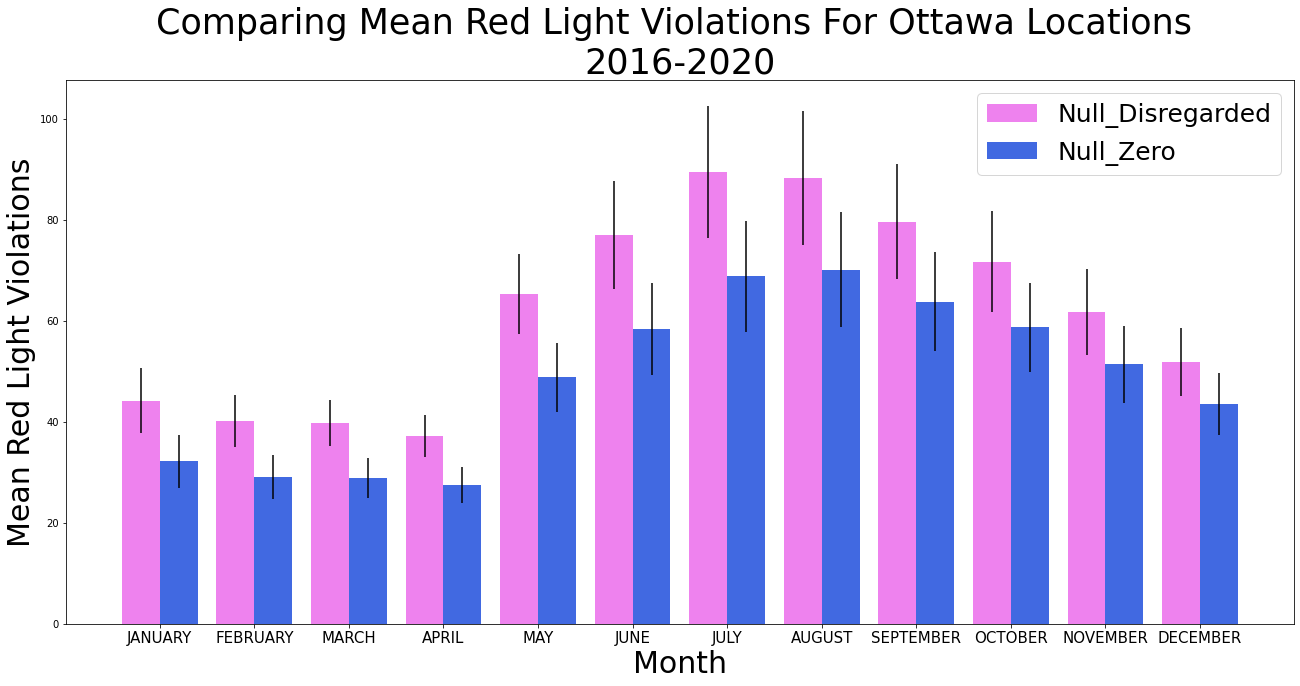

In [42]:
spaced_range = np.arange(12)
width = 0.4

all_location_error = 2*all_monthly_std_df['SE']
null_zero_error = 2*null_zero_stde_df['SE']

fig = plt.figure(figsize=(22,10))
plt.bar(spaced_range, null_comparison_means_df['Null_Disregarded'], width = width,  yerr= all_location_error, label='Null_Disregarded', color='violet')
plt.bar(spaced_range + width, null_comparison_means_df['Null_Zero'], width = width, yerr= null_zero_error, label ='Null_Zero', color='royalblue')

plt.xticks(spaced_range + width/2, null_comparison_means_df['Month'], fontsize=15)
plt.title('Comparing Mean Red Light Violations For Ottawa Locations \n2016-2020',fontsize=35)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Mean Red Light Violations', fontsize=30)
plt.legend(fontsize=25)
plt.savefig('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/comparing_null_means_monthly.png', bbox_inches='tight', facecolor = 'white')
plt.show()


<span style="color:lightseagreen; font-size:1.3em;">
	As can be seen the same general trends hold true for both datasets. Moving forward, I will be working with the null disregarded dataset - looking at only the active locations because it's reasonable to assume that null means the camera wasn't working which is different than the camera working and observing 0 red lights and I wanted the data to encode this.
</span> 


## Monthly Active Location Data Visualization

*Bar chart for `monthly_mean_df` which looks at the mean number of red light violations for all active locations per each month:*

<function matplotlib.pyplot.show(close=None, block=None)>

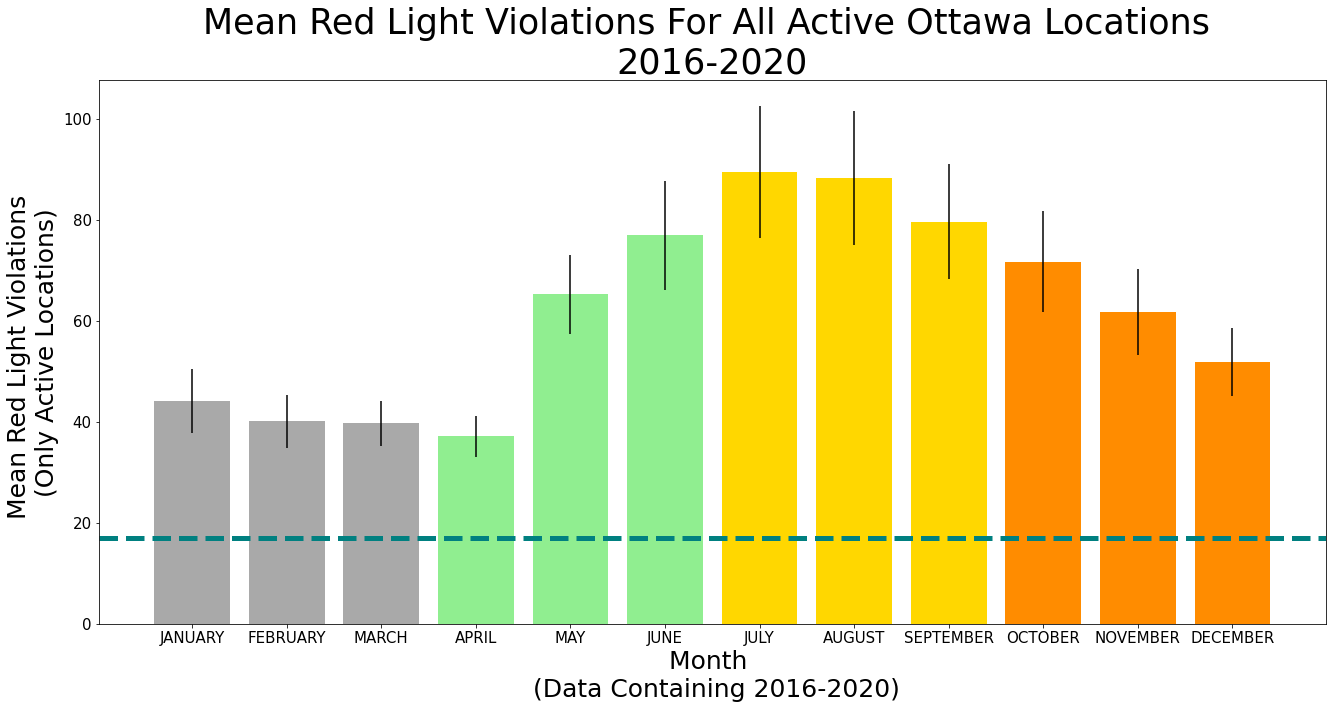

In [43]:
fig_active_months_mean = plt.figure(figsize=(22,10))
error = 2*all_monthly_std_df['SE']
new_colours = ['darkgrey'] * 3 + ['lightgreen'] * 3 + ['gold'] * 3 + ['darkorange'] * 3
plt.bar(monthly_mean_df['Month'], monthly_mean_df['Mean'], yerr= error, color=new_colours)
plt.title('Mean Red Light Violations For All Active Ottawa Locations \n2016-2020', fontsize=35)
plt.xlabel('Month \n (Data Containing 2016-2020)', fontsize=25)
plt.ylabel('Mean Red Light Violations \n(Only Active Locations)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(y=17,  color='teal', linestyle ='dashed', linewidth = 5)
plt.savefig('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/months_mean_active_locations.png', bbox_inches='tight', facecolor = 'white')
plt.show

<span style="color:lightseagreen; font-size:1.3em;">
	As can be seen all months are higher than the breakeven teal line. This means that no month should be automatically removed from being monitored as all of them make enough to justify the monitoring of them. However, the months that should have the most resources devoted to them are the summer months.
</span>

## Total Violations Monthly Calculated

In [44]:
monthly_total_df = complete_df[MONTH_COLUMNS].sum(axis=0, numeric_only=True).to_frame().reset_index().rename(columns={'index':'Month',0:'Total'})
monthly_total_df


,Month,Total
0,JANUARY,9053.0
1,FEBRUARY,8149.0
2,MARCH,8107.0
3,APRIL,7727.0
4,MAY,13708.0
5,JUNE,16395.0
6,JULY,19328.0
7,AUGUST,19696.0
8,SEPTEMBER,17922.0
9,OCTOBER,16501.0


## Monthly Visualization of Total Violations

<function matplotlib.pyplot.show(close=None, block=None)>

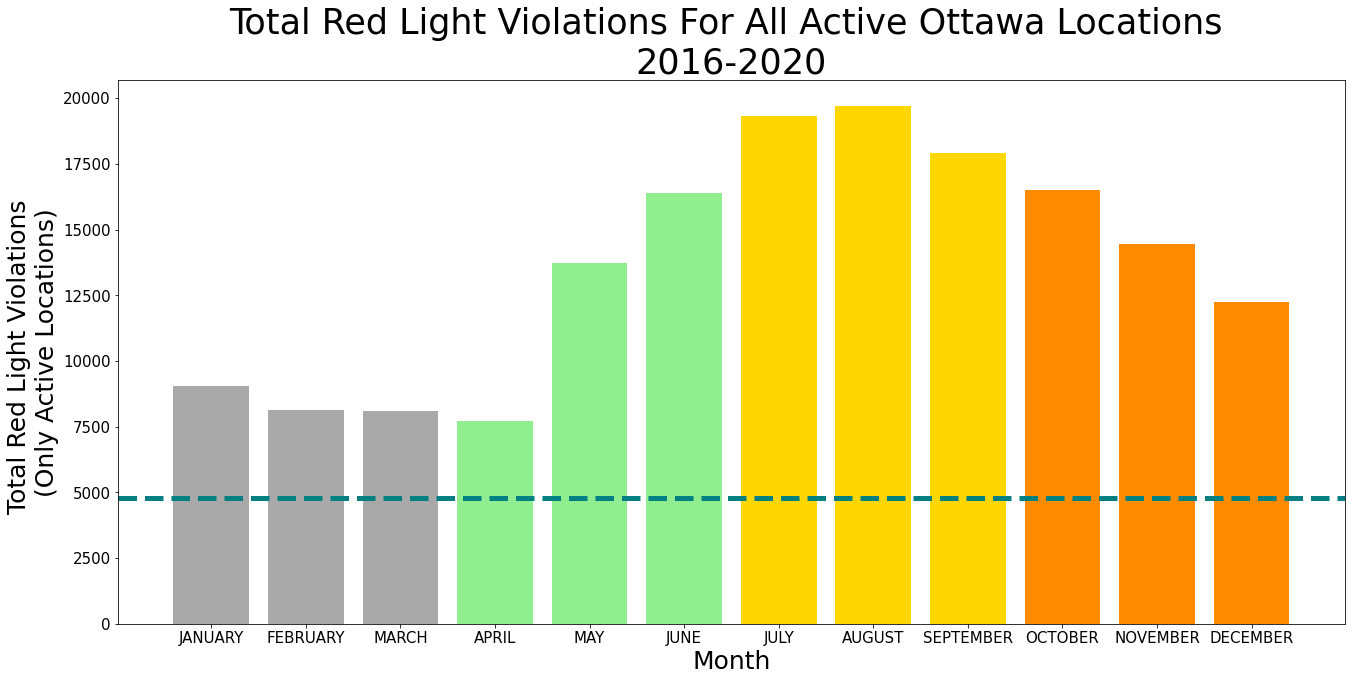

In [45]:
fig_active_months_mean = plt.figure(figsize=(22,10))
new_colours = ['darkgrey'] * 3 + ['lightgreen'] * 3 + ['gold'] * 3 + ['darkorange'] * 3
plt.bar(monthly_total_df['Month'], monthly_total_df['Total'], color=new_colours)
plt.title('Total Red Light Violations For All Active Ottawa Locations \n2016-2020', fontsize=35)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Total Red Light Violations \n(Only Active Locations)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(y=4777,  color='teal', linestyle ='dashed', linewidth = 5)
plt.savefig('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/months_total_active_locations.png', bbox_inches='tight', facecolor = 'white')
plt.show

<span style="color:royalblue; font-size:1.5em;">
	 The total red light violations seem to be following the same trend as with the monthly mean violations, as seen with the 2020 data: summer months had the highet violations (mean and total) and the winter months had the lowest violations. The main difference to highlight between the 2020 data and the 2016-2020 data: is that the winter months (January to March) is significantly lower for the larger dataset (2016-2020).
</span> 


- - -

# Question 2) Which location(s) have the most/least violations?

*In this section we want to look at which locations have the most and the least violations from the lens of return on investment (ROI)* 

### Analyzing Number of Nulls in Dataset

*Adding column to original df that counts the number of null months per location*

In [46]:
complete_df['Null_Months'] = complete_df[MONTH_COLUMNS].isnull().sum(axis=1)
# complete_df[['Year','INTERSECTION','Null_Months']]

In [47]:
complete_df['Active_Months'] = len(MONTH_COLUMNS) - complete_df['Null_Months']
#complete_df[['INTERSECTION','TOTAL_VIOLATIONS', 'Null_Months', 'Active_Months']]

In [48]:
complete_df[complete_df['Null_Months']==12]['Null_Months'].count()

36

<span style="color:orangered; font-size:1em;">
    36 locations have 12 months null value.
</span>

In [49]:
complete_df[complete_df['Null_Months']==12].apply(lambda row: row['CAMERA_INSTALL_YEAR'] > int(row['Year']), axis=1).value_counts()#.mean()


True     25
False    11
dtype: int64

In [50]:
complete_df[complete_df['Null_Months']==12].apply(lambda row: row['CAMERA_INSTALL_YEAR'] > int(row['Year']), axis=1).mean()


0.6944444444444444

<span style="color:orangered; font-size:1em;">
    Out of the 36 locations, 25 locations (69%) have null values due to the fact the year the data was pulled for is prior to when the camera was installed.	
</span> 


In [51]:
complete_df[complete_df['Active_Months']<12]['Active_Months'].count()

100

*100 data point locations have at least 1 month null. Due to this fact, we want to make sure that we are not penalizing the locations with null values but rather find the answer to our question using active months.*

## Active Months Mean

*Calculating mean over active months for each location*

In [52]:
# complete_df['Mean_Active_Months'] = complete_df['TOTAL_VIOLATIONS']/complete_df['Active_Months']
complete_df['Mean_Active_Months'] = complete_df[MONTH_COLUMNS].mean(axis=1)
complete_df[['Year','INTERSECTION','TOTAL_VIOLATIONS', 'Null_Months', 'Active_Months', 'Mean_Active_Months']]

,Year,INTERSECTION,TOTAL_VIOLATIONS,Null_Months,Active_Months,Mean_Active_Months
0,2020,WALKEY @ HAWTHORNE / RUSSELL,354.0,5,7,50.571429
1,2020,ST LAURENT @ BELFAST,357.0,0,12,29.750000
2,2020,CAMPEAU @ HWY 417 WB,480.0,0,12,40.000000
3,2020,CATHERINE @ KENT,223.0,5,7,31.857143
4,2020,BASELINE @ MERIVALE,280.0,0,12,23.333333
...,...,...,...,...,...,...
276,2016,ST. JOSEPH @ TENTH LINE,0.0,12,0,NaN
277,2016,HERON @ 155m W OF BANK,0.0,12,0,NaN
278,2016,TENTH LINE @ VANGUARD,0.0,12,0,NaN
279,2016,HAWTHORNE @ LEITRIM,0.0,12,0,NaN


## Grouping by Intersection Analysis

*Sorting the complete dataframe by the intersection, along with the year that the camera was installed to account for the multiple cameras that can be at an intersections. Every other column will have a mean actioned on the matching rows.*

In [53]:
group_by_intersection_year = complete_df.groupby(['INTERSECTION','CAMERA_INSTALL_YEAR'], axis=0).mean().reset_index()
# group_by_intersection_year

*Sorting the complete dataframe by the intersection, along with the direction that the camera is facing because the above could lead to error if two different cameras were installed in the same location on the same year. Every other column will have a mean actioned on the matching rows.*

In [54]:
group_by_intersection_direction = complete_df.groupby(['INTERSECTION','CAMERA_FACING'], axis=0).mean().reset_index()
# group_by_intersection_direction

*Albert @ Kent mean was calculated by hand to ensure correctedness.*

*Calculating by hand to ensure that both cameras for CATHERINE @ KENT were accounted for in the groupby function:*

In [55]:
complete_df[complete_df['INTERSECTION']=='CATHERINE @ KENT']

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value,Null_Months,Active_Months,Mean_Active_Months
3,2020,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,NaN,NaN,...,39.0,26.0,36.0,14.0,223.0,54.0,54.0,5,7,31.857143
36,2020,CATHERINE @ KENT,2017,45.408789,-75.693783,367907.7071,5.030189e+06,Northbound,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5,0.000000
64,2019,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,12,0,NaN
97,2019,CATHERINE @ KENT,2017,45.408789,-75.693783,367907.7071,5.030189e+06,Northbound,NaN,NaN,...,109.0,170.0,0.0,NaN,1080.0,210.0,210.0,4,8,135.000000
119,2018,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,25.0,30.0,...,NaN,NaN,NaN,NaN,246.0,59.0,59.0,5,7,35.142857
152,2018,CATHERINE @ KENT,2017,45.408789,-75.693783,367907.7071,5.030189e+06,Northbound,41.0,NaN,...,NaN,NaN,NaN,48.0,89.0,48.0,48.0,10,2,44.500000
174,2017,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,8.0,4.0,...,46.0,38.0,25.0,20.0,316.0,60.0,60.0,0,12,26.333333
207,2017,CATHERINE @ KENT,2017,45.408789,-75.693783,367907.7071,5.030189e+06,Northbound,NaN,NaN,...,207.0,145.0,87.0,95.0,778.0,207.0,207.0,6,6,129.666667
229,2016,CATHERINE @ KENT,2008,45.408789,-75.693783,367907.7071,5.030189e+06,Westbound,38.0,22.0,...,15.0,25.0,30.0,3.0,274.0,46.0,46.0,0,12,22.833333
262,2016,CATHERINE @ KENT,2017,45.408789,-75.693783,367907.7071,5.030189e+06,Northbound,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,12,0,NaN


In [56]:
group_by_intersection_direction[group_by_intersection_direction['INTERSECTION']=='CATHERINE @ KENT']

,INTERSECTION,CAMERA_FACING,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,JANUARY,FEBRUARY,MARCH,...,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value,Null_Months,Active_Months,Mean_Active_Months
23,CATHERINE @ KENT,Northbound,2017.0,45.408789,-75.693783,367907.7071,5.030189e+06,41.000000,NaN,NaN,...,105.333333,105.000000,29.000000,47.666667,389.40,93.0,116.25,7.8,4.2,77.291667
24,CATHERINE @ KENT,Westbound,2008.0,45.408789,-75.693783,367907.7071,5.030189e+06,23.666667,18.666667,15.666667,...,33.333333,29.666667,30.333333,12.333333,264.75,43.8,54.75,4.4,7.6,29.041667


## Map of All Locations

In [57]:
# https://python-visualization.github.io/folium/modules.html
all_locations_map = folium.Map(location=[group_by_intersection_direction.LATITUDE.mean(), group_by_intersection_direction.LONGITUDE.mean()],
                               tiles = 'CartoDB Positron', 
                               zoom_start=11,
                               min_zoom=9, 
                               control_scale=True)

for index, location_info in group_by_intersection_direction.iterrows():
    popup_message = "{}: {}".format(location_info['INTERSECTION'], location_info['CAMERA_FACING'])
    folium.Marker(
        [location_info['LATITUDE'], location_info['LONGITUDE']], 
        tooltip= popup_message,
        icon=folium.Icon(color = 'gray', 
                         icon='circle', 
                         icon_color = 'red', 
                         prefix='fa')
    ).add_to(all_locations_map)

all_locations_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/all_locations_map.html')
all_locations_map


## Analyzing Monthly Mean, Highest Monthly Total and Total Violations Relationships

### Analyzing Locational Rankings Based on Highest Monthly Total and Monthly Mean

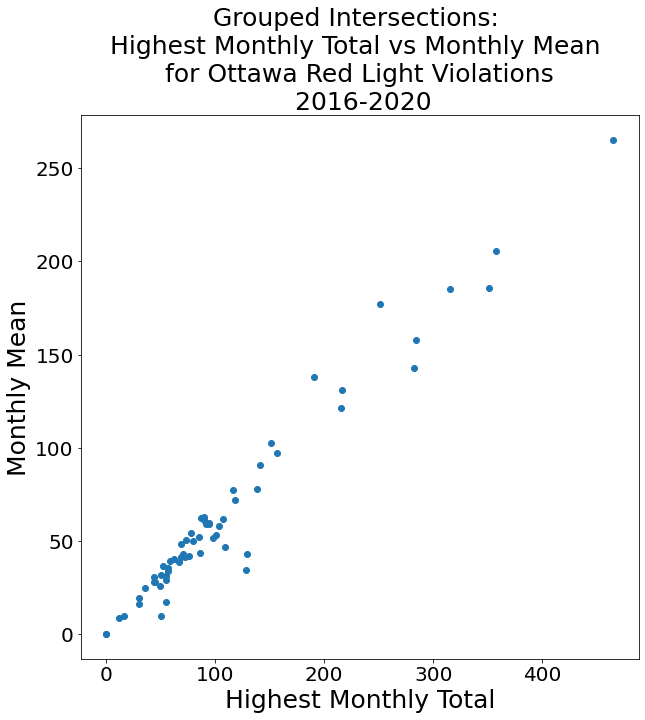

In [58]:
fig = plt.figure(figsize = (10,10))
plt.scatter(group_by_intersection_direction['Calculated_Highest_Monthly_Value'], group_by_intersection_direction['Mean_Active_Months'])
plt.title('Grouped Intersections: \nHighest Monthly Total vs Monthly Mean \n for Ottawa Red Light Violations \n 2016-2020', fontsize = 25)
plt.xlabel('Highest Monthly Total', fontsize = 25)
plt.ylabel('Monthly Mean', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

<span style="color:gray; font-size:0.9em;">
    Calculating Pearson's r using SciPy .pearsonr()
</span>

In [59]:
stats.pearsonr(group_by_intersection_direction['Calculated_Highest_Monthly_Value'], group_by_intersection_direction['Mean_Active_Months'])

(0.9789382747193629, 2.048481982952695e-42)

<span style="color:gray; font-size:0.9em;">
    Calculating Pearson's r using Pandas .corr()
</span>

In [60]:
group_by_intersection_direction[['Calculated_Highest_Monthly_Value','Mean_Active_Months']].corr(method='pearson')

,Calculated_Highest_Monthly_Value,Mean_Active_Months
Calculated_Highest_Monthly_Value,1.000000,0.978938
Mean_Active_Months,0.978938,1.000000


<span style="color:lightseagreen; font-size:1.3em;">
    As can be seen  the highest monthly total and the monthly mean are highly correlated (r = 0.9789) for the grouped data
 </span>

*Although the deviations seen are very minor, I still wanted to explore them to see if there were any other discrepancies in the data given.*

### Deviation Analysis:

In [61]:
group_by_intersection_direction[(group_by_intersection_direction['Calculated_Highest_Monthly_Value'].between(100,150))
                                &(group_by_intersection_direction['Mean_Active_Months'].between(30,50))][['INTERSECTION','CAMERA_INSTALL_YEAR','Calculated_Highest_Monthly_Value','Mean_Active_Months']+MONTH_COLUMNS]


,INTERSECTION,CAMERA_INSTALL_YEAR,Calculated_Highest_Monthly_Value,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
1,ALBERT @ KENT,2001.0,109.000000,46.732222,26.25,21.0,26.75,25.750000,38.8,50.400000,61.400000,63.400000,54.000000,90.400000,45.250000,47.000000
30,ELGIN @ SLATER,2018.0,129.000000,43.055556,38.00,36.0,40.50,34.000000,30.5,37.500000,45.333333,57.666667,36.666667,101.666667,22.333333,35.666667
55,ST. JOSEPH @ TENTH LINE,2018.0,128.333333,34.444444,17.50,16.0,20.00,17.666667,30.0,37.666667,34.666667,32.333333,29.000000,120.000000,26.666667,21.333333


<span style="color:lightseagreen; font-size:1.3em;">
    October seemed to have a big jump in cases, need to explore in more detail (looking at each year's data) to find why this is the case.
</span>

### Analyzing Locational Rankings Based on Highest Monthly Total and Total Violations

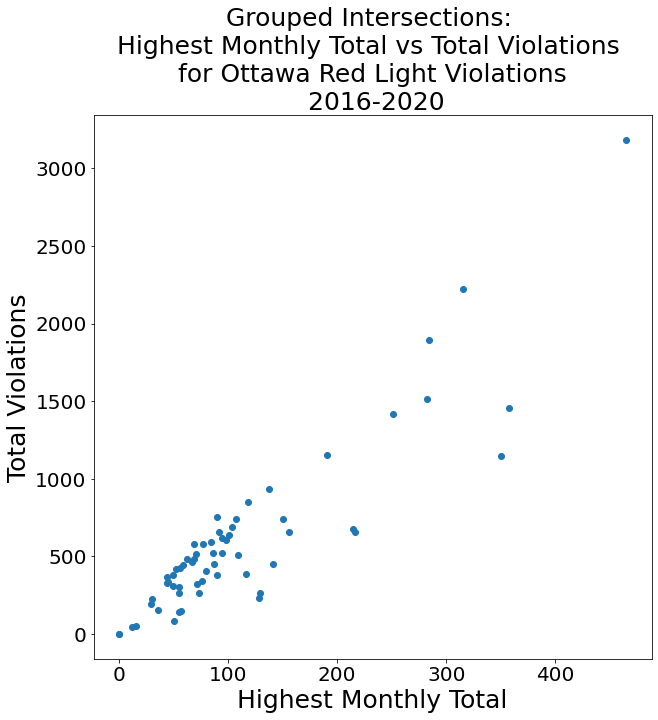

In [62]:
fig = plt.figure(figsize = (10,10))
plt.scatter(group_by_intersection_direction['Calculated_Highest_Monthly_Value'], group_by_intersection_direction['TOTAL_VIOLATIONS'])
plt.title('Grouped Intersections: \nHighest Monthly Total vs Total Violations \n for Ottawa Red Light Violations \n 2016-2020', fontsize = 25)
plt.xlabel('Highest Monthly Total', fontsize = 25)
plt.ylabel('Total Violations', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [63]:
stats.pearsonr(group_by_intersection_direction['Calculated_Highest_Monthly_Value'], group_by_intersection_direction['TOTAL_VIOLATIONS'])

(0.9013577904178959, 4.124617933644419e-23)

<span style="color:lightseagreen; font-size:1.3em;">
    As can be seen  the highest monthly total and the total violations are highly correlated (r = 0.9014) for the grouped data
 </span>

### Deviation Analysis:

In [64]:
group_by_intersection_direction[(group_by_intersection_direction['Calculated_Highest_Monthly_Value'].between(110,140))
                                &(group_by_intersection_direction['TOTAL_VIOLATIONS'].between(200,280))][['INTERSECTION','CAMERA_INSTALL_YEAR','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']+MONTH_COLUMNS]


,INTERSECTION,CAMERA_INSTALL_YEAR,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
30,ELGIN @ SLATER,2018.0,129.000000,266.2,38.0,36.0,40.5,34.000000,30.5,37.500000,45.333333,57.666667,36.666667,101.666667,22.333333,35.666667
55,ST. JOSEPH @ TENTH LINE,2018.0,128.333333,231.0,17.5,16.0,20.0,17.666667,30.0,37.666667,34.666667,32.333333,29.000000,120.000000,26.666667,21.333333


<span style="color:lightseagreen; font-size:1.3em;">
	Again a big jump up in the month of October (same 2 out of 3 intersections as monthly mean and highest monthly)
</span> 

In [65]:
group_by_intersection_direction[(group_by_intersection_direction['Calculated_Highest_Monthly_Value'].between(200,240))
                                &(group_by_intersection_direction['TOTAL_VIOLATIONS'].between(600,680))][['INTERSECTION','CAMERA_INSTALL_YEAR','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']+MONTH_COLUMNS]


,INTERSECTION,CAMERA_INSTALL_YEAR,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
46,LYON @ SLATER,2018.0,215.0,676.4,58.0,49.5,64.0,40.5,134.5,184.5,204.666667,182.333333,142.0,93.0,98.333333,84.0
60,WALKLEY @ RYDER / DON RIED,2020.0,216.0,655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,216.0,115.0,127.000000,112.0


<span style="color:lightseagreen; font-size:1.3em;">
	One intersection had a lot of null values, leading to a low total violations. The other intersection just had abnormally high number of summer violations (Lyon @ Slater)
</span> 

In [66]:
group_by_intersection_direction[(group_by_intersection_direction['Calculated_Highest_Monthly_Value'].between(340,360))
                                &(group_by_intersection_direction['TOTAL_VIOLATIONS'].between(1100,1500))][['INTERSECTION','CAMERA_INSTALL_YEAR','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']+MONTH_COLUMNS]


,INTERSECTION,CAMERA_INSTALL_YEAR,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
36,HERON @ 155m W OF BANK,2017.0,357.500000,1457.6,246.666667,151.333333,88.666667,21.0,163.0,344.0,361.5,262.0,241.333333,161.750000,256.250000,170.750000
41,KENT @ ARLINGTON,2018.0,350.666667,1144.2,117.000000,131.500000,98.000000,99.0,202.5,300.0,278.0,349.0,262.333333,126.333333,127.666667,131.666667


<span style="color:lightseagreen; font-size:1.3em;">
	March and April were fairly low, leading to a lower total violations.
</span> 

### Analyzing Locational Rankings Based on Monthly Mean and Total Violations

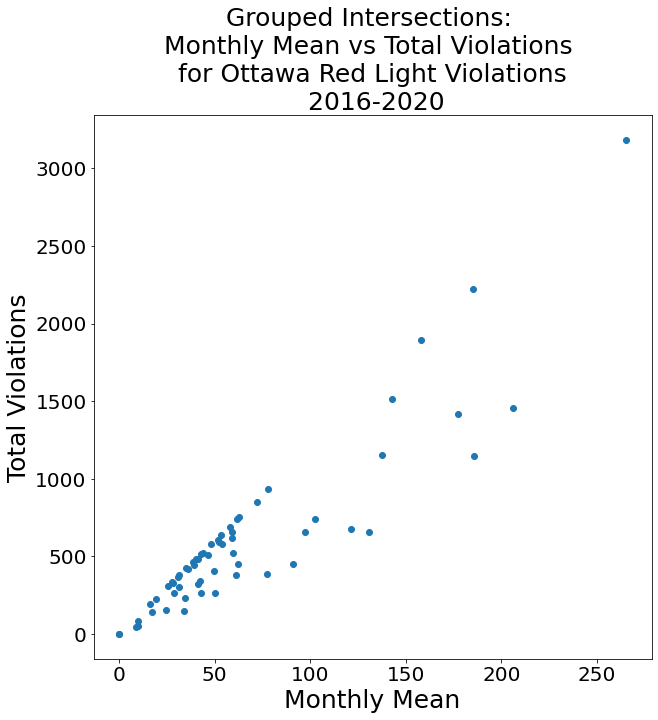

In [67]:
fig = plt.figure(figsize = (10,10))
plt.scatter(group_by_intersection_direction['Mean_Active_Months'], group_by_intersection_direction['TOTAL_VIOLATIONS'])
plt.title('Grouped Intersections: \nMonthly Mean vs Total Violations \n for Ottawa Red Light Violations \n 2016-2020', fontsize = 25)
plt.xlabel('Monthly Mean', fontsize = 25)
plt.ylabel('Total Violations', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [68]:
stats.pearsonr(group_by_intersection_direction['Mean_Active_Months'], group_by_intersection_direction['TOTAL_VIOLATIONS'])

(0.9124358492711642, 1.4404247171973506e-24)

<span style="color:lightseagreen; font-size:1.3em;">
    As can be seen  the monthly mean and the total violations are highly correlated (r = 0.9124) for the grouped data
 </span>

### Deviation Analysis:

In [69]:
group_by_intersection_direction[(group_by_intersection_direction['Mean_Active_Months'].between(115,175))
                                &(group_by_intersection_direction['TOTAL_VIOLATIONS'].between(500,700))][['INTERSECTION','CAMERA_INSTALL_YEAR','TOTAL_VIOLATIONS','Mean_Active_Months']+MONTH_COLUMNS]


,INTERSECTION,CAMERA_INSTALL_YEAR,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
46,LYON @ SLATER,2018.0,676.4,121.401515,58.0,49.5,64.0,40.5,134.5,184.5,204.666667,182.333333,142.0,93.0,98.333333,84.0
60,WALKLEY @ RYDER / DON RIED,2020.0,655.0,131.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,216.0,115.0,127.000000,112.0


In [70]:
group_by_intersection_direction[(group_by_intersection_direction['Mean_Active_Months'].between(175,225))
                                &(group_by_intersection_direction['TOTAL_VIOLATIONS'].between(1100,1500))][['INTERSECTION','CAMERA_INSTALL_YEAR','TOTAL_VIOLATIONS','Mean_Active_Months']+MONTH_COLUMNS]


,INTERSECTION,CAMERA_INSTALL_YEAR,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
36,HERON @ 155m W OF BANK,2017.0,1457.6,205.858333,246.666667,151.333333,88.666667,21.0,163.0,344.0,361.5,262.0,241.333333,161.750000,256.250000,170.750000
41,KENT @ ARLINGTON,2018.0,1144.2,185.611111,117.000000,131.500000,98.000000,99.0,202.5,300.0,278.0,349.0,262.333333,126.333333,127.666667,131.666667
42,KING EDWARD @ BESSERER,2020.0,1419.0,177.375000,NaN,NaN,NaN,NaN,162.0,213.0,239.0,251.0,225.000000,158.000000,164.000000,7.000000


<span style="color:lightseagreen; font-size:1.3em;">
	All reasons are very similiar to the above deviations
</span> 


## Comparing Sorted Values

**Here we will be comparing the values sorted by monthly mean, highest monthly value, and the total number of violations, in order to determine which is best suited for analyzing our data set.**

*Sorting values according to Monthly Mean.*

In [71]:
group_by_intersection_direction.sort_values('Mean_Active_Months', axis=0, ascending = False)[['INTERSECTION','CAMERA_INSTALL_YEAR','CAMERA_FACING', 'Mean_Active_Months','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']].head(10)


,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,Mean_Active_Months,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS
44,KING EDWARD @ ST. PATRICK,2011.0,Southbound,265.250000,465.000000,3183.0
36,HERON @ 155m W OF BANK,2017.0,Eastbound,205.858333,357.500000,1457.6
41,KENT @ ARLINGTON,2018.0,Northbound,185.611111,350.666667,1144.2
51,RUSSELL @ ST-LAURENT,2020.0,Southbound,185.083333,315.000000,2221.0
42,KING EDWARD @ BESSERER,2020.0,Northbound,177.375000,251.000000,1419.0
43,KING EDWARD @ ST. ANDREW,2012.0,Northbound,157.983333,284.200000,1895.8
22,CATHERINE & O'CONNOR @ HWY 417 WB,2008.0,Westbound,142.646667,282.200000,1516.8
8,BANK @ RIVERSIDE S.,2017.0,Northbound,137.782738,190.750000,1152.0
60,WALKLEY @ RYDER / DON RIED,2020.0,Westbound,131.000000,216.000000,655.0
46,LYON @ SLATER,2018.0,Southbound,121.401515,215.000000,676.4


*Sorting values according to Highest Monthly Value.*

In [72]:
group_by_intersection_direction.sort_values('Calculated_Highest_Monthly_Value', axis=0, ascending = False)[['INTERSECTION','CAMERA_INSTALL_YEAR','CAMERA_FACING', 'Mean_Active_Months','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']].head(10)


,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,Mean_Active_Months,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS
44,KING EDWARD @ ST. PATRICK,2011.0,Southbound,265.250000,465.000000,3183.0
36,HERON @ 155m W OF BANK,2017.0,Eastbound,205.858333,357.500000,1457.6
41,KENT @ ARLINGTON,2018.0,Northbound,185.611111,350.666667,1144.2
51,RUSSELL @ ST-LAURENT,2020.0,Southbound,185.083333,315.000000,2221.0
43,KING EDWARD @ ST. ANDREW,2012.0,Northbound,157.983333,284.200000,1895.8
22,CATHERINE & O'CONNOR @ HWY 417 WB,2008.0,Westbound,142.646667,282.200000,1516.8
42,KING EDWARD @ BESSERER,2020.0,Northbound,177.375000,251.000000,1419.0
60,WALKLEY @ RYDER / DON RIED,2020.0,Westbound,131.000000,216.000000,655.0
46,LYON @ SLATER,2018.0,Southbound,121.401515,215.000000,676.4
8,BANK @ RIVERSIDE S.,2017.0,Northbound,137.782738,190.750000,1152.0


*Sorting values according to Total Violations.*

In [73]:
group_by_intersection_direction.sort_values('TOTAL_VIOLATIONS', axis=0, ascending = False)[['INTERSECTION','CAMERA_INSTALL_YEAR','CAMERA_FACING', 'Mean_Active_Months','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']].head(10)


,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,Mean_Active_Months,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS
44,KING EDWARD @ ST. PATRICK,2011.0,Southbound,265.250000,465.000000,3183.0
51,RUSSELL @ ST-LAURENT,2020.0,Southbound,185.083333,315.000000,2221.0
43,KING EDWARD @ ST. ANDREW,2012.0,Northbound,157.983333,284.200000,1895.8
22,CATHERINE & O'CONNOR @ HWY 417 WB,2008.0,Westbound,142.646667,282.200000,1516.8
36,HERON @ 155m W OF BANK,2017.0,Eastbound,205.858333,357.500000,1457.6
42,KING EDWARD @ BESSERER,2020.0,Northbound,177.375000,251.000000,1419.0
8,BANK @ RIVERSIDE S.,2017.0,Northbound,137.782738,190.750000,1152.0
41,KENT @ ARLINGTON,2018.0,Northbound,185.611111,350.666667,1144.2
21,CARLING @ RICHMOND,2001.0,Westbound,78.000000,138.000000,936.0
15,BRONSON @ CARLING / GLEBE,2001.0,Southbound,72.040000,118.600000,849.2


<span style="color:royalblue; font-size:1.5em;">All three forms of analyzing the data (</span> `TOTAL_VIOLATIONS`, `Calculated_Highest_Monthly_Value`, <span style="color:royalblue; font-size:1.5em;">and</span> `Mean_Active_Months`<span style="color:royalblue; font-size:1.5em;">) yield very similar results. So I will be working with the Average Monthly Mean (to give a good understanding of which locations are consistently performing well or poorly) and with Total Violations (to give a good understanding which locations are worth keeping for a full year).</span>



## Average Monthly Mean:

## Top 10 Locations based on Average Monthly Mean 

In [74]:
grouped_intersection_mean = group_by_intersection_direction.sort_values('Mean_Active_Months', axis=0, ascending = False).reset_index().drop('index',axis=1)
grouped_intersection_mean['Ranking']=grouped_intersection_mean.index +1

In [75]:
grouped_intersection_mean[['INTERSECTION','CAMERA_INSTALL_YEAR','CAMERA_FACING', 'Mean_Active_Months','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']].head(10)

,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,Mean_Active_Months,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS
0,KING EDWARD @ ST. PATRICK,2011.0,Southbound,265.250000,465.000000,3183.0
1,HERON @ 155m W OF BANK,2017.0,Eastbound,205.858333,357.500000,1457.6
2,KENT @ ARLINGTON,2018.0,Northbound,185.611111,350.666667,1144.2
3,RUSSELL @ ST-LAURENT,2020.0,Southbound,185.083333,315.000000,2221.0
4,KING EDWARD @ BESSERER,2020.0,Northbound,177.375000,251.000000,1419.0
5,KING EDWARD @ ST. ANDREW,2012.0,Northbound,157.983333,284.200000,1895.8
6,CATHERINE & O'CONNOR @ HWY 417 WB,2008.0,Westbound,142.646667,282.200000,1516.8
7,BANK @ RIVERSIDE S.,2017.0,Northbound,137.782738,190.750000,1152.0
8,WALKLEY @ RYDER / DON RIED,2020.0,Westbound,131.000000,216.000000,655.0
9,LYON @ SLATER,2018.0,Southbound,121.401515,215.000000,676.4


### Map of Top 10 Locations (Average Monthly Mean)

In [76]:
top10_grouped_intersection_mean = grouped_intersection_mean.head(10)

In [77]:
top10_grouped_mean_map = folium.Map(location=[top10_grouped_intersection_mean.LATITUDE.mean(), top10_grouped_intersection_mean.LONGITUDE.mean()], 
                                    tiles = 'CartoDB Positron', 
                                    zoom_start=12, 
                                    min_zoom=9,
                                    control_scale=True)
for index, location_info in top10_grouped_intersection_mean.iterrows():
    popup_message = '{}) {}: {} - monthly mean ~{}'.format(location_info['Ranking'], location_info['INTERSECTION'], location_info['CAMERA_FACING'], round(location_info['Mean_Active_Months']))
    folium.Marker(
        [location_info['LATITUDE'], location_info['LONGITUDE']], 
        tooltip = popup_message, 
        icon = plugins.BeautifyIcon(number = location_info['Ranking'], 
                                    border_color = 'dodgerblue', 
                                    border_width = 1, 
                                    text_color = 'dodgerblue', 
                                    inner_icon_style = 'margin-top:1px;')
    ).add_to(top10_grouped_mean_map)
top10_grouped_mean_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/top10_grouped_mean_map.html')
top10_grouped_mean_map


## Bottom 10 Locations based on Average Monthly Mean

In [78]:
group_by_intersection_direction[['INTERSECTION','CAMERA_INSTALL_YEAR','CAMERA_FACING', 'Mean_Active_Months','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']].sort_values('Mean_Active_Months', axis=0, ascending = False).tail(10)


,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,Mean_Active_Months,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS
16,BRONSON @ COMMISSIONER / SLATER,2010.0,Southbound,25.850000,49.20,310.2
31,FALLOWFIELD @ CEDARVIEW,2017.0,Westbound,24.812500,35.75,154.2
3,AVIATION PARKWAY @ OGILVIE,2010.0,Westbound,19.372727,30.40,228.6
39,INNES @ ORLEANS,2017.0,Southbound,17.458333,55.25,139.4
20,CARLING @ ISLAND PARK,2008.0,Eastbound,16.400000,29.80,196.8
34,HAWTHORNE @ LEITRIM,2017.0,Northbound,9.854167,50.75,82.0
6,BANK @ HUNT CLUB,2020.0,Northbound,9.800000,16.00,49.0
49,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,2020.0,Southbound,8.800000,12.00,44.0
12,BERRIGAN @ WESSEX / GREENBANK,2010.0,Southbound,0.000000,0.00,0.0
0,ALBERT @ BOOTH,2010.0,Eastbound,0.000000,0.00,0.0


### Map of Bottom 10 Locations (Average Monthly Mean)

In [79]:
bottom10_grouped_intersection = grouped_intersection_mean.tail(10)

In [80]:
bottom10_grouped_mean_map = folium.Map(location=[bottom10_grouped_intersection.LATITUDE.mean(), bottom10_grouped_intersection.LONGITUDE.mean()], 
                                       tiles = 'CartoDB Positron', 
                                       zoom_start=11, 
                                       min_zoom=9,
                                       control_scale=True)

for index, location_info in bottom10_grouped_intersection.iterrows():
    popup_message = '{}) {}: {} - monthly mean ~{}'.format(location_info['Ranking'], location_info['INTERSECTION'], location_info['CAMERA_FACING'], round(location_info['Mean_Active_Months']))
    folium.Marker([location_info['LATITUDE'], location_info['LONGITUDE']], 
                  tooltip = popup_message,
                  icon = plugins.BeautifyIcon(number = location_info['Ranking'], 
                                    border_color = 'dodgerblue', 
                                    border_width = 1, 
                                    text_color = 'dodgerblue', 
                                    inner_icon_style = 'margin-top:1px;')
                 ).add_to(bottom10_grouped_mean_map)
bottom10_grouped_mean_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/bottom10_grouped_mean_map.html')
bottom10_grouped_mean_map


### Heat Map for Grouped Data (Monthly Mean: 2016-2020)

In [81]:
grouped_intersection_mean_heat = grouped_intersection_mean[['LATITUDE', 'LONGITUDE', 'Mean_Active_Months']]

In [82]:
grouped_intersection_mean_heatmap = folium.Map([grouped_intersection_mean_heat.LATITUDE.mean(), grouped_intersection_mean_heat.LONGITUDE.mean()],
                                                tiles = 'CartoDB Positron',
                                                zoom_start = 11,
                                                min_zoom=9,)
plugins.HeatMap(grouped_intersection_mean_heat).add_to(grouped_intersection_mean_heatmap)

grouped_intersection_mean_heatmap.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/grouped2016-2020_mean_heatmap.html')
grouped_intersection_mean_heatmap

## Total Violations:

### Top 10 Locations based on Average Total Violations

In [83]:
grouped_intersection_total = group_by_intersection_direction.sort_values('TOTAL_VIOLATIONS', axis=0, ascending = False).reset_index().drop('index',axis=1)
grouped_intersection_total['Ranking']=grouped_intersection_total.index +1


In [84]:
top10_grouped_intersection_total = grouped_intersection_total.head(10)
top10_grouped_intersection_total

,INTERSECTION,CAMERA_FACING,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,JANUARY,FEBRUARY,MARCH,...,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value,Null_Months,Active_Months,Mean_Active_Months,Ranking
0,KING EDWARD @ ST. PATRICK,Southbound,2011.0,45.432467,-75.689087,368248.7041,5.032824e+06,164.000000,140.400000,127.000000,...,339.000000,264.000000,214.200000,3183.0,465.0,465.000000,0.0,12.0,265.250000,1
1,RUSSELL @ ST-LAURENT,Southbound,2020.0,45.399905,-75.621586,373569.7331,5.029261e+06,16.000000,49.000000,43.000000,...,220.000000,248.000000,193.000000,2221.0,315.0,315.000000,0.0,12.0,185.083333,2
2,KING EDWARD @ ST. ANDREW,Northbound,2012.0,45.433795,-75.689912,368182.7030,5.032971e+06,101.400000,91.000000,103.600000,...,199.200000,186.600000,135.200000,1895.8,284.2,284.200000,0.0,12.0,157.983333,3
3,CATHERINE & O'CONNOR @ HWY 417 WB,Westbound,2008.0,45.410594,-75.689464,368243.7079,5.030393e+06,89.000000,84.250000,56.800000,...,168.750000,141.250000,115.500000,1516.8,282.2,282.200000,1.6,10.4,142.646667,4
4,HERON @ 155m W OF BANK,Eastbound,2017.0,45.378404,-75.669459,369846.5513,5.026831e+06,246.666667,151.333333,88.666667,...,161.750000,256.250000,170.750000,1457.6,286.0,357.500000,4.6,7.4,205.858333,5
5,KING EDWARD @ BESSERER,Northbound,2020.0,45.428093,-75.685291,368550.7052,5.032341e+06,NaN,NaN,NaN,...,158.000000,164.000000,7.000000,1419.0,251.0,251.000000,4.0,8.0,177.375000,6
6,BANK @ RIVERSIDE S.,Northbound,2017.0,45.388020,-75.676237,369304.7159,5.027895e+06,107.000000,88.333333,123.000000,...,126.500000,127.500000,113.000000,1152.0,152.6,190.750000,3.4,8.6,137.782738,7
7,KENT @ ARLINGTON,Northbound,2018.0,45.409413,-75.694272,367868.7071,5.030258e+06,117.000000,131.500000,98.000000,...,126.333333,127.666667,131.666667,1144.2,263.0,350.666667,6.0,6.0,185.611111,8
8,CARLING @ RICHMOND,Westbound,2001.0,45.360785,-75.792266,360245.6751,5.024782e+06,43.400000,39.600000,40.600000,...,87.400000,83.400000,49.400000,936.0,138.0,138.000000,0.0,12.0,78.000000,9
9,BRONSON @ CARLING / GLEBE,Southbound,2001.0,45.401001,-75.699654,367456.7071,5.029319e+06,45.200000,29.200000,37.600000,...,84.200000,83.000000,55.800000,849.2,118.6,118.600000,0.4,11.6,72.040000,10


#### Map of Top 10 Locations (Average Total Violations)

In [85]:
top10_grouped_total_map = folium.Map(location=[top10_grouped_intersection_total.LATITUDE.mean(), top10_grouped_intersection_total.LONGITUDE.mean()], 
                                    tiles = 'CartoDB Positron', 
                                    zoom_start=12,
                                    min_zoom=9, 
                                    control_scale=True)
for index, location_info in top10_grouped_intersection_total.iterrows():
    popup_message = '{}) {}: {} - avg yearly total ~{}'.format(location_info['Ranking'], location_info['INTERSECTION'], location_info['CAMERA_FACING'], round(location_info['TOTAL_VIOLATIONS']))
    folium.Marker(
        [location_info['LATITUDE'], location_info['LONGITUDE']], 
        tooltip = popup_message, 
        icon = plugins.BeautifyIcon(number = location_info['Ranking'], 
                                    border_color = 'dodgerblue', 
                                    border_width = 1, 
                                    text_color = 'dodgerblue', 
                                    inner_icon_style = 'margin-top:1px;')
    ).add_to(top10_grouped_total_map)
top10_grouped_total_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/top10_grouped_total_map.html')
top10_grouped_total_map


### Bottom 10 Locations based on Average Total Violations

In [86]:
bottom10_grouped_intersection_total = grouped_intersection_total.tail(10)
bottom10_grouped_intersection_total

,INTERSECTION,CAMERA_FACING,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,JANUARY,FEBRUARY,MARCH,...,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value,Null_Months,Active_Months,Mean_Active_Months,Ranking
51,AVIATION PARKWAY @ OGILVIE,Westbound,2010.0,45.427987,-75.627017,373110.7230,5.032377e+06,15.800000,14.400000,13.800000,...,15.25,22.600000,18.20,228.6,30.4,30.400000,0.2,11.8,19.372727,52
52,CARLING @ ISLAND PARK,Eastbound,2008.0,45.389192,-75.726627,365357.6989,5.027986e+06,19.400000,13.600000,18.200000,...,16.00,11.400000,10.00,196.8,29.8,29.800000,0.0,12.0,16.400000,53
53,FALLOWFIELD @ CEDARVIEW,Westbound,2017.0,45.278666,-75.779918,361294.6699,5.015664e+06,34.000000,20.500000,19.000000,...,18.50,25.333333,23.00,154.2,28.6,35.750000,6.0,6.0,24.812500,54
54,BOOTH @ WELLINGTON (RR40),Eastbound,2009.0,45.416296,-75.714674,366264.2570,5.031007e+06,51.000000,53.000000,53.000000,...,37.50,30.000000,17.00,149.6,42.5,56.666667,8.0,4.0,33.916667,55
55,INNES @ ORLEANS,Southbound,2017.0,45.444503,-75.532804,380460.7951,5.034296e+06,15.000000,11.333333,10.666667,...,47.50,15.250000,11.75,139.4,44.2,55.250000,4.2,7.8,17.458333,56
56,HAWTHORNE @ LEITRIM,Northbound,2017.0,45.340613,-75.578239,377038.7589,5.022710e+06,6.666667,4.666667,3.000000,...,47.50,6.000000,5.25,82.0,40.6,50.750000,4.2,7.8,9.854167,57
57,BANK @ HUNT CLUB,Northbound,2020.0,45.353631,-75.647331,371608.7310,5.024097e+06,NaN,NaN,NaN,...,16.00,5.000000,14.00,49.0,16.0,16.000000,7.0,5.0,9.800000,58
58,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,Southbound,2020.0,45.410594,-75.689464,368243.7110,5.030393e+06,NaN,NaN,NaN,...,9.00,10.000000,10.00,44.0,12.0,12.000000,7.0,5.0,8.800000,59
59,BERRIGAN @ WESSEX / GREENBANK,Southbound,2010.0,45.274975,-75.749006,363723.6849,5.015276e+06,NaN,NaN,NaN,...,0.00,0.000000,0.00,0.0,0.0,0.000000,11.0,1.0,0.000000,60
60,ALBERT @ BOOTH,Eastbound,2010.0,45.412918,-75.712652,366426.2120,5.030633e+06,NaN,NaN,NaN,...,0.00,0.000000,0.00,0.0,0.0,0.000000,11.0,1.0,0.000000,61


### Map of Bottom 10 Locations (Average Total Violations)

In [87]:
bottom10_grouped_total_map = folium.Map(location=[bottom10_grouped_intersection_total.LATITUDE.mean(), bottom10_grouped_intersection_total.LONGITUDE.mean()], 
                                       tiles = 'CartoDB Positron', 
                                       zoom_start=11,
                                       min_zoom=9, 
                                       control_scale=True)

for index, location_info in bottom10_grouped_intersection_total.iterrows():
    popup_message = '{}) {}: {} - avg yearly total ~{}'.format(location_info['Ranking'], location_info['INTERSECTION'], location_info['CAMERA_FACING'], round(location_info['TOTAL_VIOLATIONS']))
    folium.Marker([location_info['LATITUDE'], location_info['LONGITUDE']], 
                  tooltip = popup_message,
                  icon = plugins.BeautifyIcon(number = location_info['Ranking'], 
                                    border_color = 'dodgerblue', 
                                    border_width = 1, 
                                    text_color = 'dodgerblue', 
                                    inner_icon_style = 'margin-top:1px;')
                 ).add_to(bottom10_grouped_total_map)
    
bottom10_grouped_total_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/bottom10_grouped_total_map.html')
bottom10_grouped_total_map


### Heat Map for Grouped Data (Total Violations: 2016-2020)

In [88]:
grouped_intersection_total_heat = grouped_intersection_total[['LATITUDE', 'LONGITUDE', 'TOTAL_VIOLATIONS']]

In [89]:
grouped_intersection_total_heatmap = folium.Map([grouped_intersection_total_heat.LATITUDE.mean(), grouped_intersection_total_heat.LONGITUDE.mean()],
                                                tiles = 'CartoDB Positron',
                                                zoom_start = 11,
                                                min_zoom=9,)

plugins.HeatMap(grouped_intersection_total_heat).add_to(grouped_intersection_total_heatmap)
grouped_intersection_total_heatmap.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/grouped2016-2020_total_heatmap.html')
grouped_intersection_total_heatmap

<span style="color:royalblue; font-size:1.5em;">
	As can be seen from both the top 10 and bottom 10 of the average monthly mean and total violations, along with the heat map, the majority of the violations occur in the downtown region (Lowertown and Centretown), along with Alta Vista. 
</span> 

## Bar Graph of Grouped by Intersection Data

### Bar Graph: Monthly Mean

*Using `.loc` to change the colour of the bars to make the locations that don't breakeven more obvious.*

In [90]:
# group_by_intersection_direction.insert(0,'Mean_BarColours','dimgray')

In [91]:
# group_by_intersection_direction.loc[group_by_intersection_direction['Mean_Active_Months'] < 17, 'Mean_BarColours'] = 'lightcoral'


*Using `.apply()` and `lamda` to add a column for colour coding the bar graph for any location that does not breakeven*

In [92]:
monthly_breakeven_point = 17

In [93]:
group_by_intersection_direction['Mean_BarColours'] = group_by_intersection_direction.apply(lambda row: 'lightcoral' 
                                                                                           if row['Mean_Active_Months'] < monthly_breakeven_point 
                                                                                           else 'dimgray', 
                                                                                           axis=1)
# group_by_intersection_direction


In [94]:
group_by_intersection_direction_mean_trimmed = group_by_intersection_direction[['INTERSECTION','CAMERA_FACING','Mean_Active_Months','Mean_BarColours']].set_index(['INTERSECTION', 'CAMERA_FACING'])
# for .barh() to work, there is only allowed to be a single index, so we must join our two indices:
group_by_intersection_direction_mean_trimmed.index = [': '.join(i) for i in group_by_intersection_direction_mean_trimmed.index]


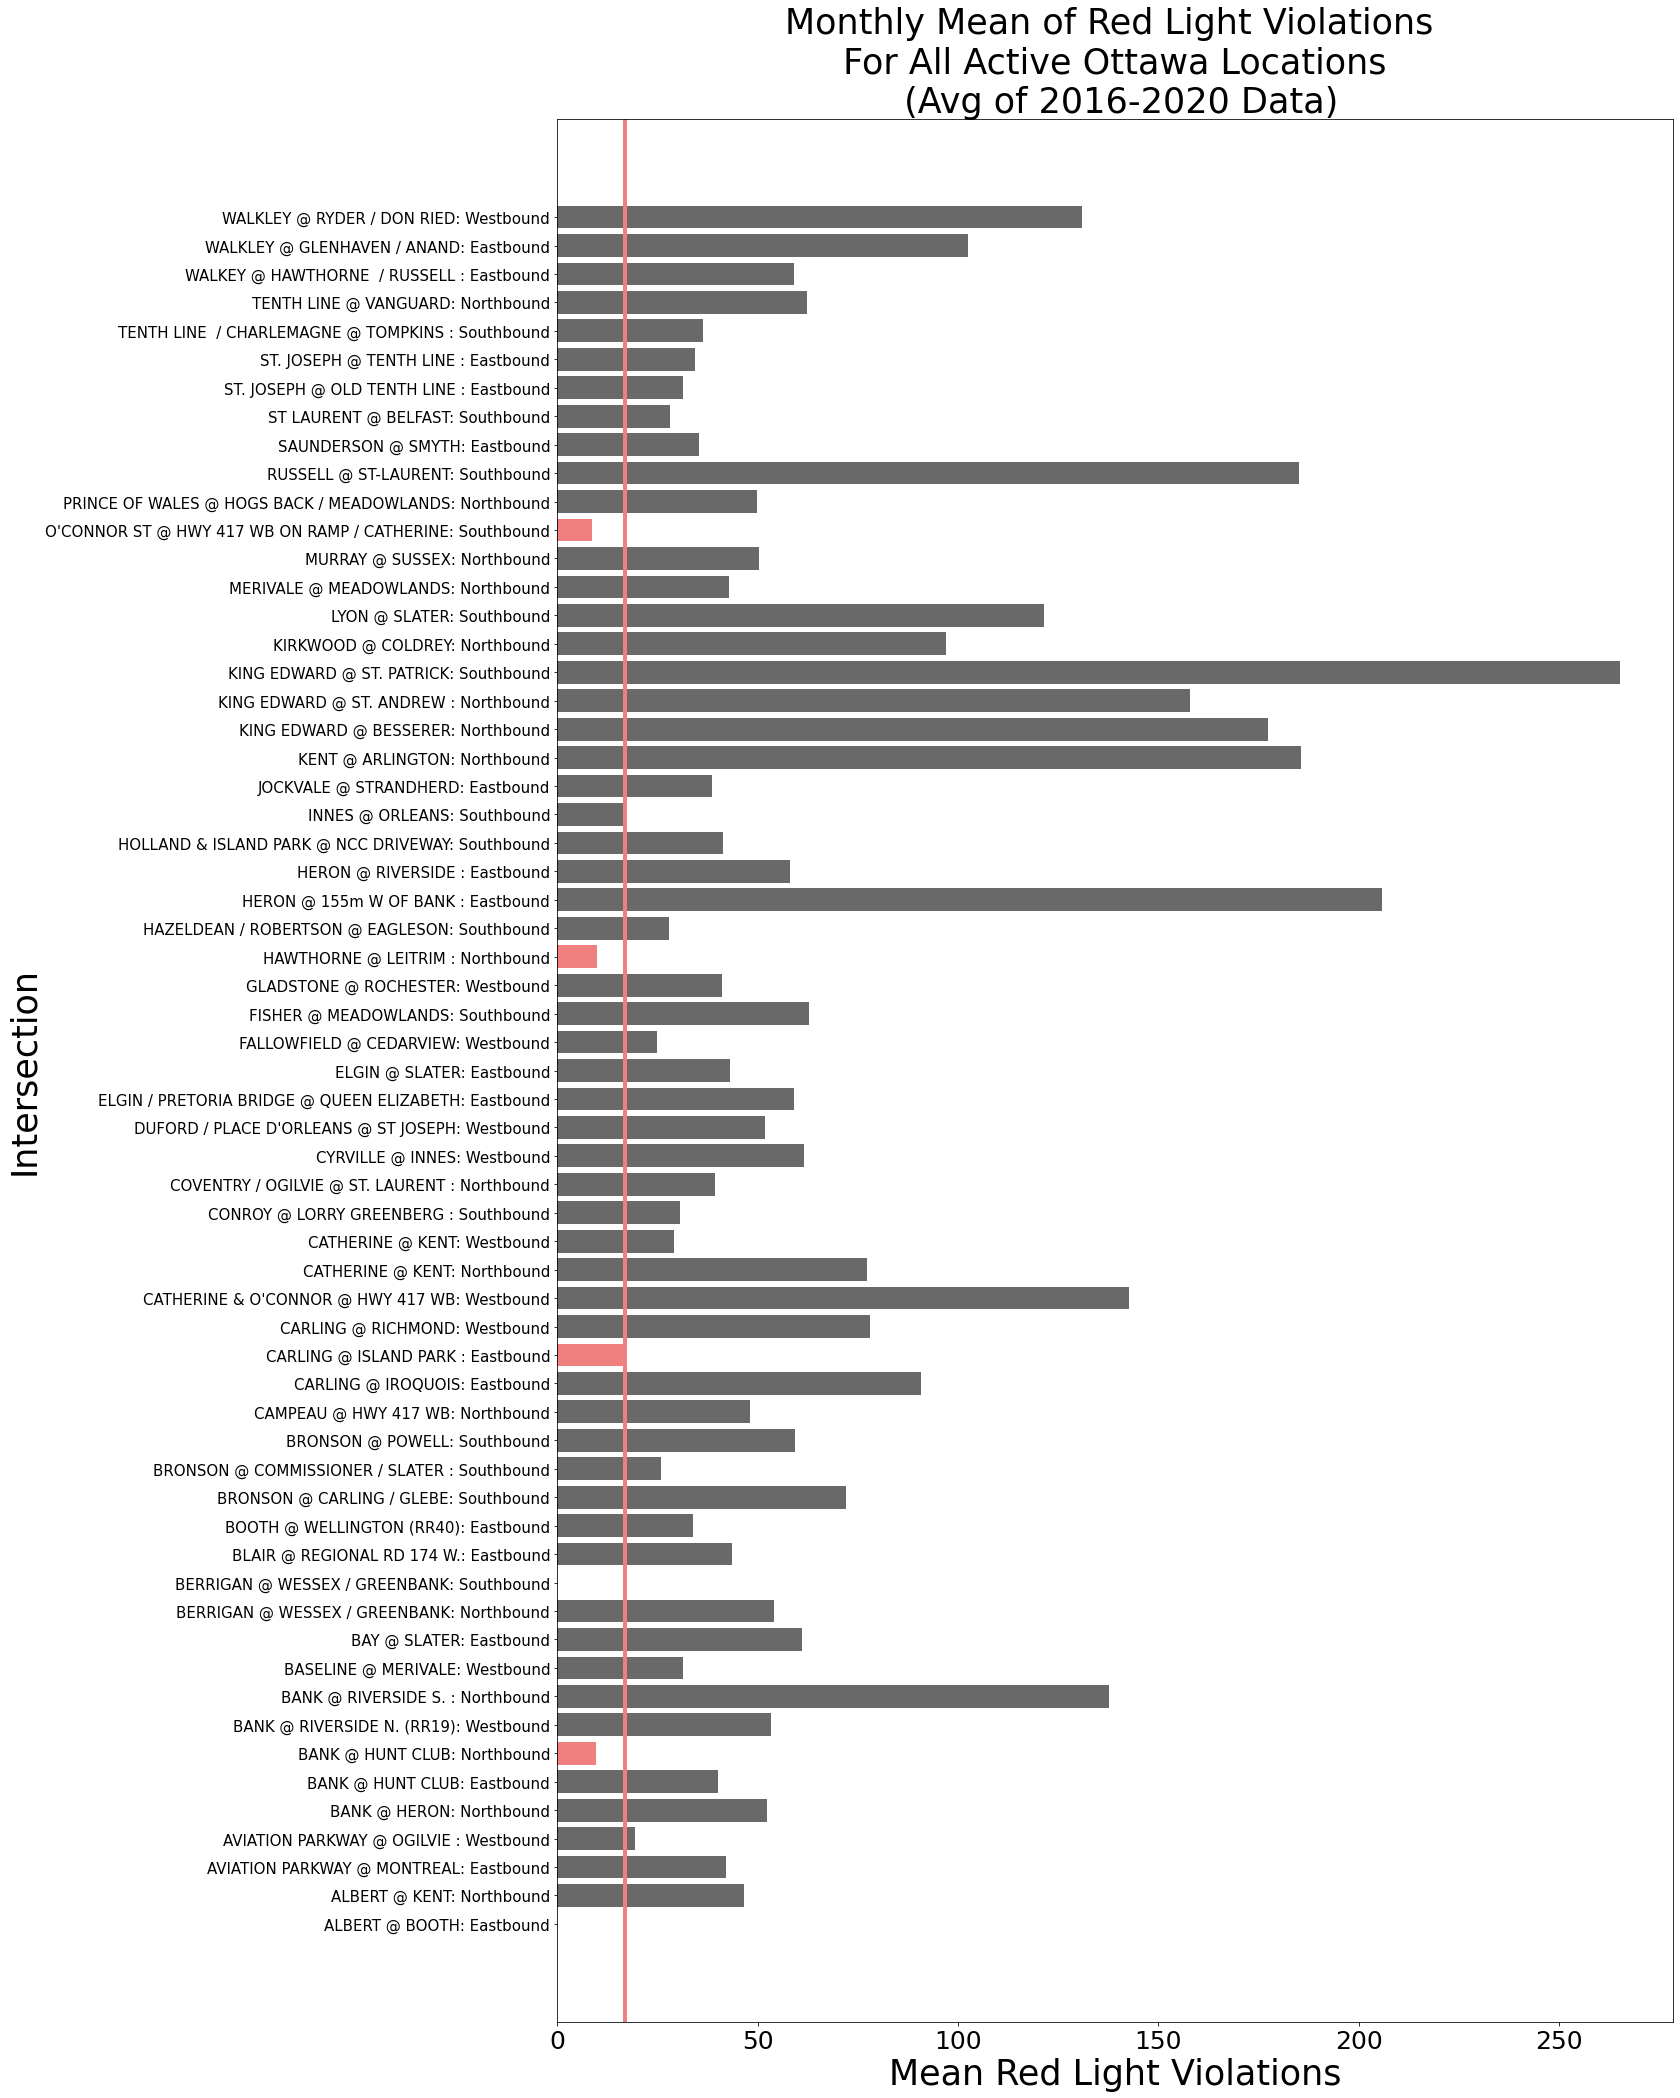

In [95]:
# must convert colour column from dataframe into a list for it to be inputted into the bar graph.
colours = group_by_intersection_direction_mean_trimmed['Mean_BarColours'].tolist()

plt.figure(figsize=(20,35))
plt.barh(group_by_intersection_direction_mean_trimmed.index, group_by_intersection_direction_mean_trimmed['Mean_Active_Months'], color = colours)
plt.title('Monthly Mean of Red Light Violations \n For All Active Ottawa Locations \n (Avg of 2016-2020 Data)', fontsize=35)
plt.ylabel('Intersection', fontsize=35)
plt.yticks(fontsize=15)
plt.xlabel('Mean Red Light Violations', fontsize=35)
plt.xticks(fontsize=25)
plt.axvline(x=17,  color='lightcoral', linewidth = 4)

plt.savefig('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/grouped-intersection-mean-barh.png', bbox_inches='tight', facecolor = 'white')


<span style="color:lightseagreen; font-size:1.3em;">
	The locations which do not breakeven for monthly mean (on average for years 2016-2020) are: <br>
    - O'Connor st @ HWY 417 WB on ramp / Catherine: Southbound <br>
    - Hawthorne @ Leitrim: Northbound <br>
    - Carling @ Island Park: Eastbound <br>
    - Berrigan @ Wessex/Greenbank: Southbound <br>
    - Bank @ Hunt Club: Northbound <br>
    - Albert @ Booth: Eastbound
</span>  

### Bar Graph: Total Violations

In [96]:
total_violations_breakeven_point = 204

In [97]:
group_by_intersection_direction['Total_BarColours'] = group_by_intersection_direction.apply(lambda row: 'lightcoral' 
                                                                                            if row['TOTAL_VIOLATIONS'] < total_violations_breakeven_point 
                                                                                            else 'dimgray',
                                                                                            axis =1)
# group_by_intersection_direction


In [98]:
group_by_intersection_direction_total_trimmed = group_by_intersection_direction[['INTERSECTION', 'CAMERA_FACING', 'TOTAL_VIOLATIONS','Total_BarColours']].set_index(['INTERSECTION', 'CAMERA_FACING'])
group_by_intersection_direction_total_trimmed.index = [': '.join(i) for i in group_by_intersection_direction_total_trimmed.index]



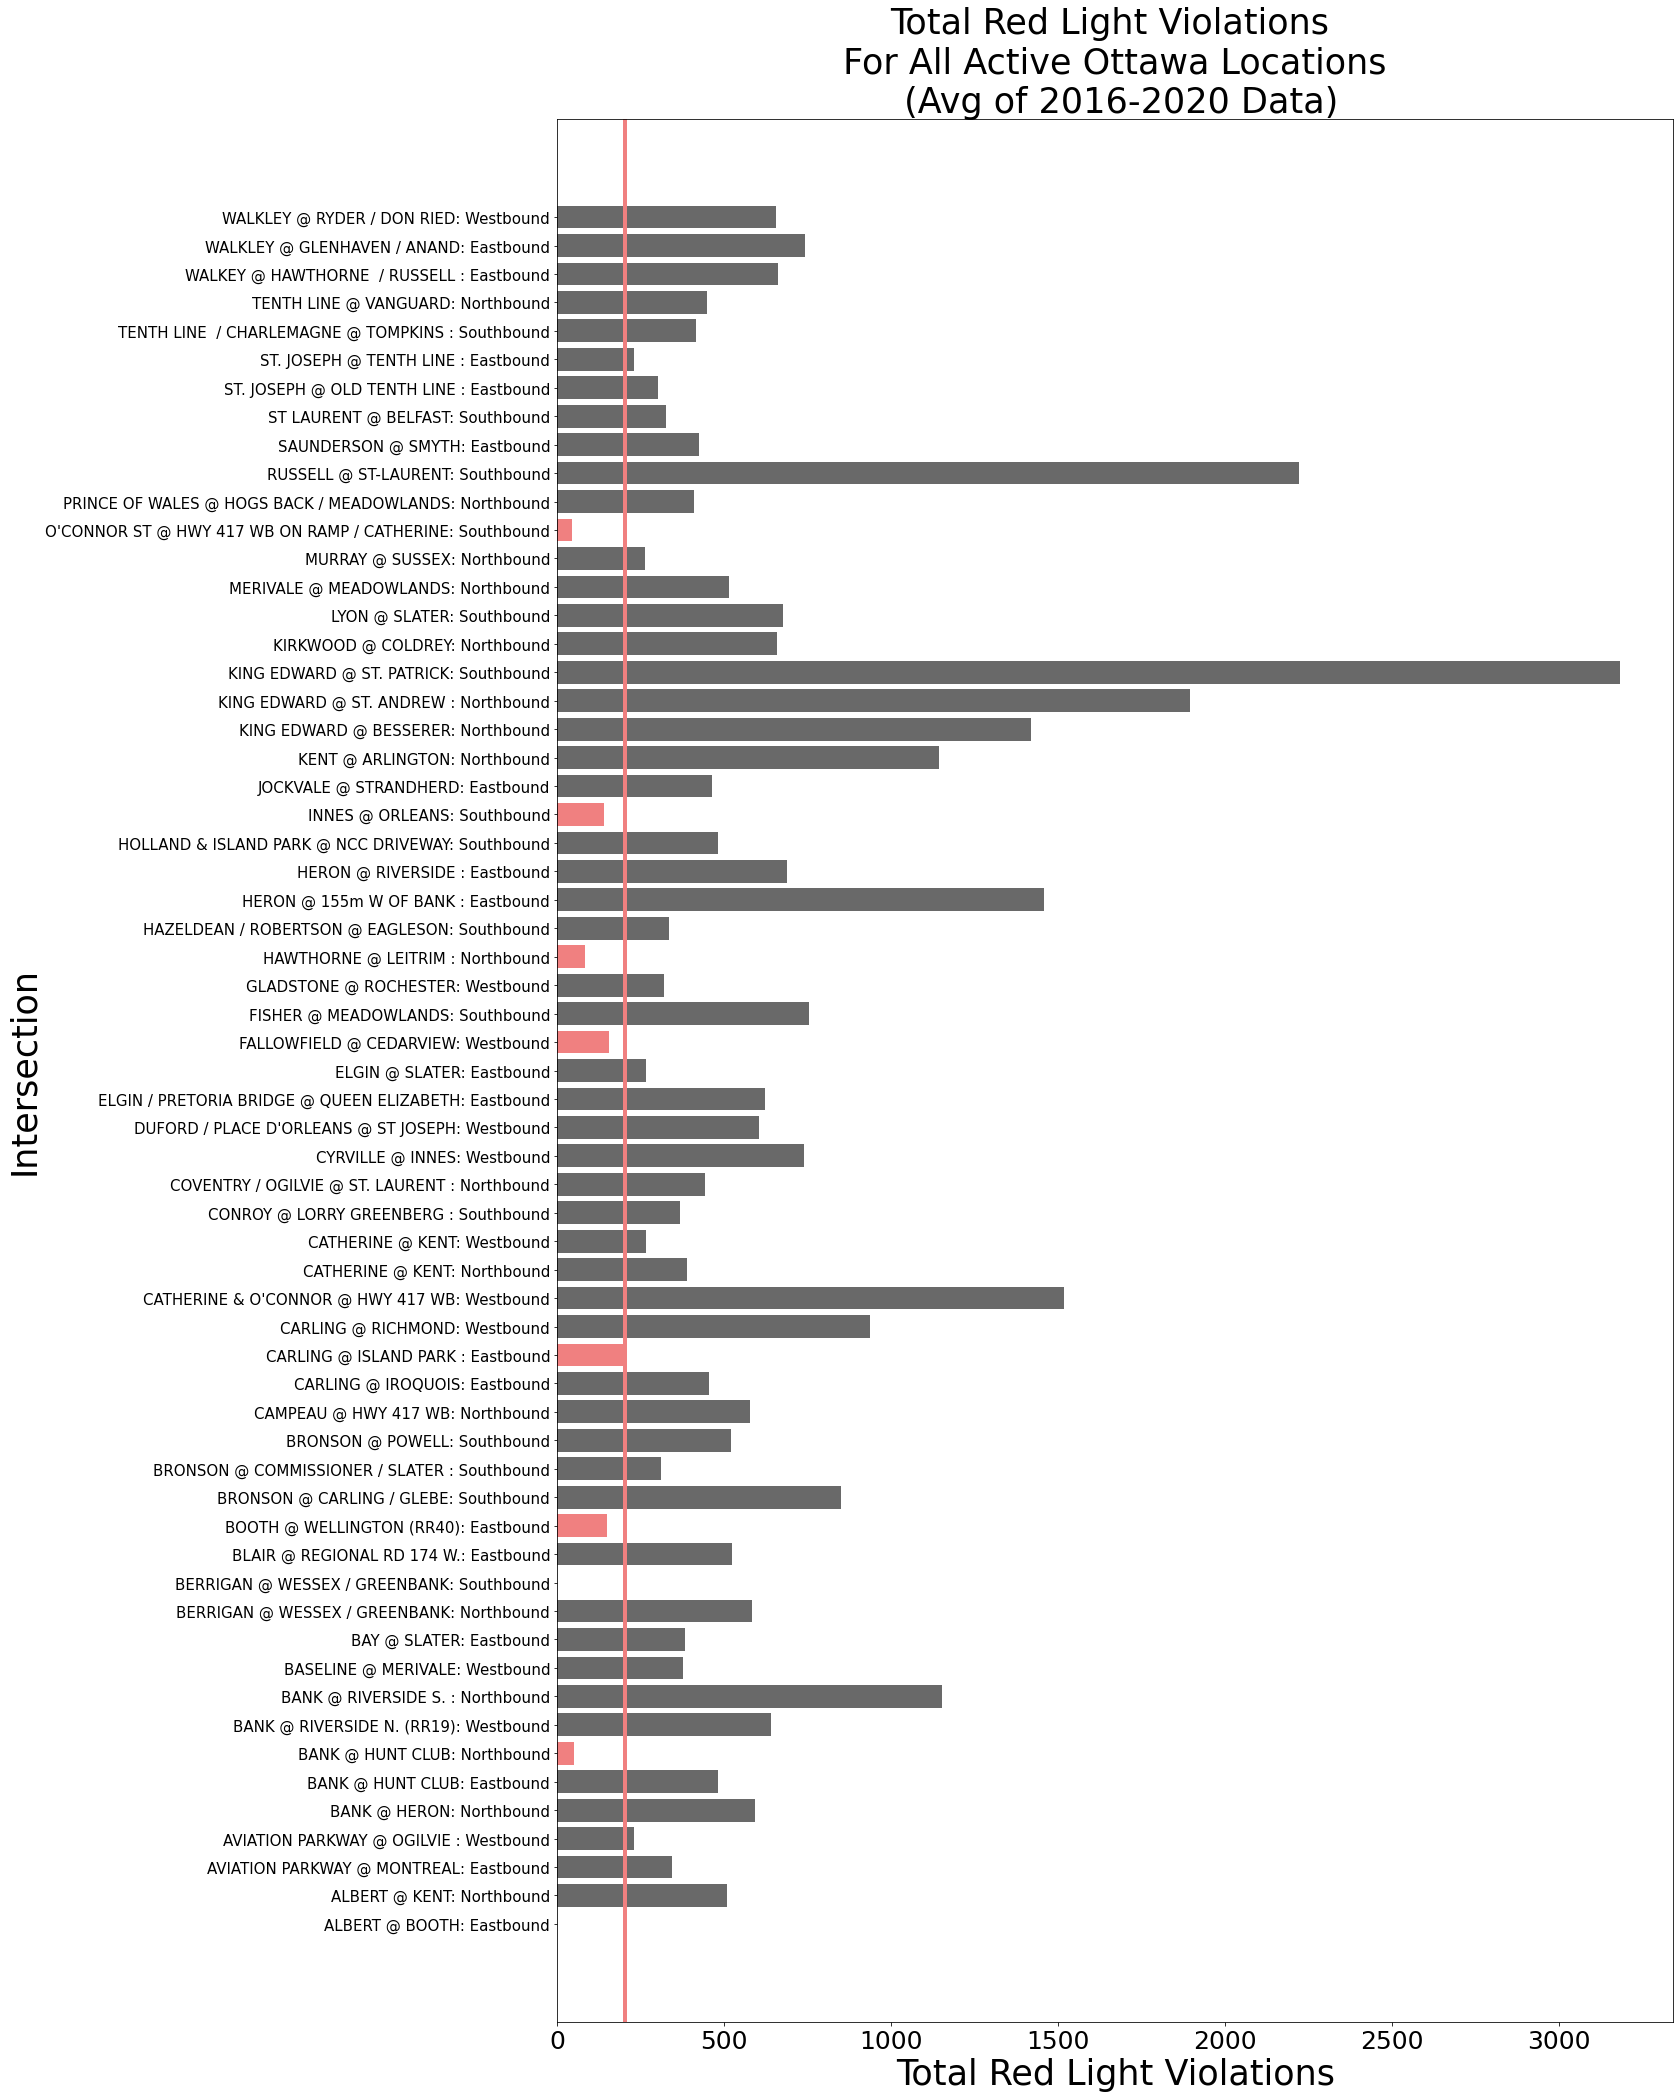

In [99]:
colours = group_by_intersection_direction_total_trimmed['Total_BarColours'].tolist()

plt.figure(figsize=(20,35))
plt.barh(group_by_intersection_direction_total_trimmed.index, group_by_intersection_direction_total_trimmed['TOTAL_VIOLATIONS'], color = colours)
plt.title('Total Red Light Violations \n For All Active Ottawa Locations \n (Avg of 2016-2020 Data)', fontsize=35)
plt.ylabel('Intersection', fontsize=35)
plt.yticks(fontsize=15)
plt.xlabel('Total Red Light Violations', fontsize=35)
plt.xticks(fontsize=25)
plt.axvline(x=204,  color='lightcoral', linewidth = 4)

plt.savefig('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/grouped-intersection-total-barh.png', bbox_inches='tight', facecolor = 'white')


<span style="color:lightseagreen; font-size:1.3em;">
	The locations which do not breakeven for total violations (on average for years 2016-2020) are: <br>
    - O'Connor st @ HWY 417 WB on ramp / Catherine: Southbound <br>
    - <b>Innes @ Orleans: Southbound</b><br>
    - Hawthorne @ Leitrim: Northbound <br>
    - <b>Fallowfield @ Cedarview: Westbound</b><br>
    - Carling @ Island Park: Eastbound <br>
    - <b>Booth @ Wellington (RR40): Eastbound</b><br>
    - Berrigan @ Wessex/Greenbank: Southbound <br>
    - Bank @ Hunt Club: Northbound<br>
    - Albert @ Booth: Eastbound<br><br>
    The <b>bold</b> locations are the locations that are different from the monthly mean. These would be good locations to look at in the in-depth location analysis.
</span>  

## In-depth Analysis of Locations

**Delving in deeper into the locational data and looking at each year and location as separate entries to find more detailed insights**

*Sorting all locations and all years by Highest Monthly Total* 

In [100]:
highest_monthly_total_df = complete_df.sort_values(by='HIGHEST_MONTHLY_TOTAL', ascending=False)
highest_monthly_total_df['Ranking'] = highest_monthly_total_df.index +1

In [101]:
highest_monthly_total_df[['Year','INTERSECTION','HIGHEST_MONTHLY_TOTAL']].head(20)

,Year,INTERSECTION,HIGHEST_MONTHLY_TOTAL
72,2019,KING EDWARD @ ST. PATRICK,674.0
127,2018,KING EDWARD @ ST. PATRICK,616.0
104,2019,KENT @ ARLINGTON,516.0
11,2020,KING EDWARD @ ST. PATRICK,466.0
143,2018,KING EDWARD @ ST. ANDREW,447.0
167,2018,HERON @ 155m W OF BANK,396.0
112,2019,HERON @ 155m W OF BANK,390.0
222,2017,HERON @ 155m W OF BANK,379.0
232,2016,CATHERINE & O'CONNOR @ HWY 417 WB,357.0
27,2020,KING EDWARD @ ST. ANDREW,347.0


*Sorting all locations and all years by Monthly Mean* 

In [102]:
sorted_mean_monthly_df = complete_df.sort_values(by='Mean_Active_Months', ascending=False)
sorted_mean_monthly_df[['INTERSECTION','TOTAL_VIOLATIONS', 'Null_Months', 'Active_Months', 'Mean_Active_Months']]

,INTERSECTION,TOTAL_VIOLATIONS,Null_Months,Active_Months,Mean_Active_Months
72,KING EDWARD @ ST. PATRICK,4739.0,0,12,394.916667
127,KING EDWARD @ ST. PATRICK,4154.0,0,12,346.166667
222,HERON @ 155m W OF BANK,826.0,9,3,275.333333
11,KING EDWARD @ ST. PATRICK,3203.0,0,12,266.916667
167,HERON @ 155m W OF BANK,3180.0,0,12,265.000000
...,...,...,...,...,...
276,ST. JOSEPH @ TENTH LINE,0.0,12,0,NaN
277,HERON @ 155m W OF BANK,0.0,12,0,NaN
278,TENTH LINE @ VANGUARD,0.0,12,0,NaN
279,HAWTHORNE @ LEITRIM,0.0,12,0,NaN


### Comparing Highest Monthly Total and Monthly Mean

*Make scatterplot to see if there is a correlation between the highest month (`Calculated_Highest_Monthly_Value`) for each location and the mean (`Mean_Active_Months`) for each location in `df`, to further explore the common deviations seen in the grouped data:*

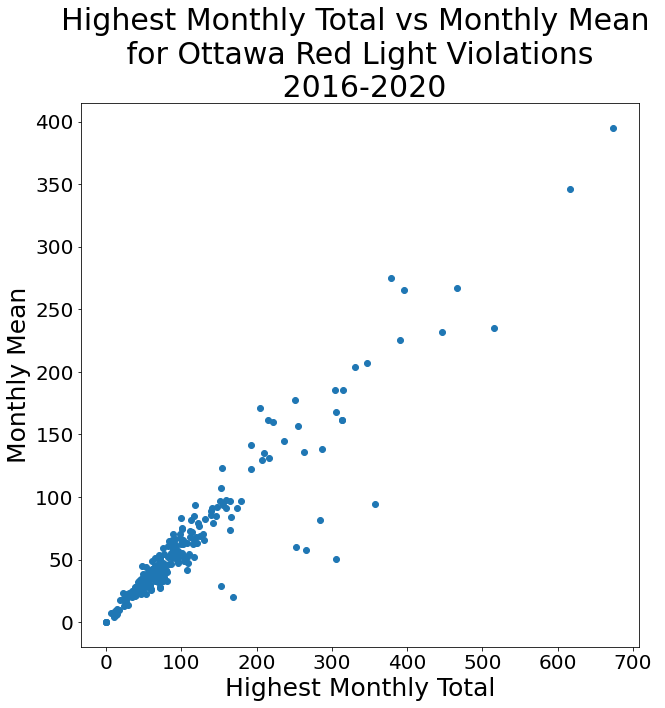

In [103]:
fig = plt.figure(figsize=(10,10))
plt.scatter(complete_df['Calculated_Highest_Monthly_Value'], complete_df['Mean_Active_Months'])
plt.title('Highest Monthly Total vs Monthly Mean \n for Ottawa Red Light Violations \n 2016-2020', fontsize=30)
plt.xlabel('Highest Monthly Total', fontsize=25)
plt.ylabel('Monthly Mean', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<span style="color:gray; font-size:0.9em;">
    Calculating Pearson's r using Pandas .corr() because it excudes null values
</span>

In [104]:
complete_df[['Calculated_Highest_Monthly_Value','Mean_Active_Months']].corr(method='pearson')

,Calculated_Highest_Monthly_Value,Mean_Active_Months
Calculated_Highest_Monthly_Value,1.000000,0.941198
Mean_Active_Months,0.941198,1.000000


<span style="color:lightseagreen; font-size:1.3em;">
    As can be seen, highest monthly total and monthly mean are highly correlated (r = 0.9412).
</span>

### Deviation Analysis:

*Finding the high Monthly Total and low Mean Monthly outlier from scatterplot*

In [105]:
complete_df[(complete_df['Calculated_Highest_Monthly_Value'].between(250,375))&(complete_df['Mean_Active_Months'].between(20,100))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR','Calculated_Highest_Monthly_Value','Mean_Active_Months']+MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,Calculated_Highest_Monthly_Value,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
51,2020,HERON @ 155m W OF BANK,2017,265.0,57.600000,265.0,169.0,112.0,29.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
87,2019,ALBERT @ KENT,2001,284.0,81.500000,37.0,30.0,47.0,45.0,50.0,94.0,106.0,105.0,63.0,284.0,64.0,53.0
103,2019,ELGIN @ SLATER,2018,252.0,59.916667,37.0,39.0,35.0,42.0,35.0,42.0,51.0,58.0,54.0,252.0,38.0,36.0
111,2019,ST. JOSEPH @ TENTH LINE,2018,306.0,50.083333,14.0,19.0,17.0,22.0,40.0,43.0,30.0,34.0,30.0,306.0,23.0,23.0
232,2016,CATHERINE & O'CONNOR @ HWY 417 WB,2008,357.0,94.500000,44.0,39.0,9.0,29.0,357.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
complete_df[(complete_df['Calculated_Highest_Monthly_Value'].between(140,180))&(complete_df['Mean_Active_Months'].between(10,45))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR','Calculated_Highest_Monthly_Value','Mean_Active_Months']+MONTH_COLUMNS]

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,Calculated_Highest_Monthly_Value,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
109,2019,INNES @ ORLEANS,2017,153.0,28.50,19.0,14.0,16.0,22.0,13.0,21.0,26.0,20.0,15.0,153.0,14.0,9.0
114,2019,HAWTHORNE @ LEITRIM,2017,169.0,19.75,7.0,5.0,3.0,9.0,6.0,3.0,12.0,6.0,9.0,169.0,4.0,4.0


 <span style="color:orangered; font-size:1.3em;">
    5 out of the 7 main "outliers" were because the data for 2019 in October had a unrealistic jump in red light violations. There is no indication as to why this happened, for this data set we will assume an error in the data collection phase.
 </span>

### Comparing Highest Monthly Total and Total Violations

*Checking if there is a correlation between `'Mean_Active_Months'` and `'TOTAL_VIOLATIONS'`*

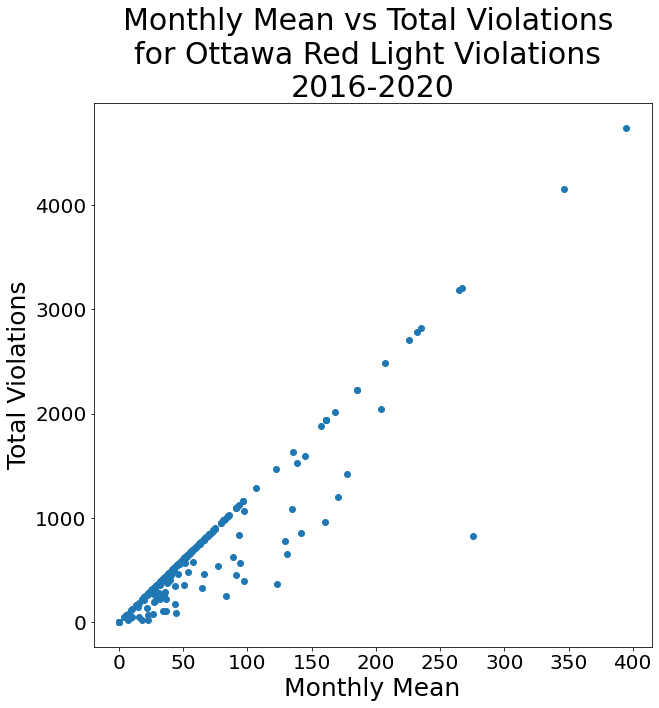

In [107]:
fig = plt.figure(figsize=(10,10))
plt.scatter(complete_df['Mean_Active_Months'], complete_df['TOTAL_VIOLATIONS'])
plt.title('Monthly Mean vs Total Violations \nfor Ottawa Red Light Violations \n2016-2020', fontsize=30)
plt.xlabel('Monthly Mean', fontsize=25)
plt.ylabel('Total Violations', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [108]:
complete_df[['Mean_Active_Months','TOTAL_VIOLATIONS']].corr(method='pearson')

,Mean_Active_Months,TOTAL_VIOLATIONS
Mean_Active_Months,1.000000,0.934235
TOTAL_VIOLATIONS,0.934235,1.000000


<span style="color:lightseagreen; font-size:1.3em;">
    As can be seen, highest monthly total and total violations are highly correlated (r = 0.9342), with some deviations.
</span> 

### Deviation Analysis:

*Largest outlier:*

In [109]:
complete_df[(complete_df['Mean_Active_Months'].between(250, 300)) 
            & (complete_df['TOTAL_VIOLATIONS'].between(250,900))][['Year','INTERSECTION', 'CAMERA_INSTALL_YEAR','TOTAL_VIOLATIONS','Mean_Active_Months']+MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
222,2017,HERON @ 155m W OF BANK,2017,826.0,275.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,379.0,230.0


In [110]:
complete_df[(complete_df['Mean_Active_Months'].between(90, 150)) 
            & (complete_df['TOTAL_VIOLATIONS'].between(100,900))][['Year','INTERSECTION', 'CAMERA_INSTALL_YEAR','TOTAL_VIOLATIONS','Mean_Active_Months']+MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
55,2020,WALKLEY @ RYDER / DON RIED,2020,655.0,131.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,216.0,115.0,127.0,112.0
58,2020,CARLING @ IROQUOIS,2020,454.0,90.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,141.0,116.0,82.0,59.0
156,2018,BAY @ SLATER,2018,839.0,93.222222,NaN,NaN,NaN,38.0,102.0,93.0,118.0,105.0,116.0,93.0,87.0,87.0
170,2018,LYON @ SLATER,2018,850.0,141.666667,NaN,NaN,NaN,NaN,NaN,NaN,161.0,192.0,153.0,143.0,114.0,87.0
207,2017,CATHERINE @ KENT,2017,778.0,129.666667,NaN,NaN,NaN,NaN,NaN,NaN,103.0,141.0,207.0,145.0,87.0,95.0
209,2017,KIRKWOOD @ COLDREY,2017,390.0,97.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,160.0,110.0,120.0
220,2017,WALKLEY @ GLENHAVEN / ANAND,2017,370.0,123.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,154.0,106.0
232,2016,CATHERINE & O'CONNOR @ HWY 417 WB,2008,567.0,94.500000,44.0,39.0,9.0,29.0,357.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:orangered; font-size:1.3em;">
	A lot of null values which lowered the total number of violations but kept the monthly mean high
</span> 

*Look at the locations for 2020 that had low total violations but high monthly mean, to examine any locations that should be more actively repaired to increase revenue:*

In [111]:
complete_df[(complete_df['Mean_Active_Months'].between(50, 225)) 
            & (complete_df['TOTAL_VIOLATIONS'].between(500,2100))
           & (complete_df['Year'].str.contains('2020'))
           & (complete_df['Active_Months']<12)][['Active_Months']+['Year','INTERSECTION', 'CAMERA_INSTALL_YEAR','TOTAL_VIOLATIONS','Mean_Active_Months']+MONTH_COLUMNS]


,Active_Months,Year,INTERSECTION,CAMERA_INSTALL_YEAR,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
21,7,2020,ELGIN / PRETORIA BRIDGE @ QUEEN ELIZABETH,2010,538.0,76.857143,NaN,NaN,NaN,NaN,NaN,7.0,100.0,119.0,123.0,82.0,85.0,22.0
51,10,2020,HERON @ 155m W OF BANK,2017,576.0,57.600000,265.0,169.0,112.0,29.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
55,5,2020,WALKLEY @ RYDER / DON RIED,2020,655.0,131.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,216.0,115.0,127.0,112.0
59,8,2020,KING EDWARD @ BESSERER,2020,1419.0,177.375000,NaN,NaN,NaN,NaN,162.0,213.0,239.0,251.0,225.0,158.0,164.0,7.0


<span style="color:royalblue; font-size:1.3em;">
	- KING EDWARD @ BESSERER and WALKLEY @ RYDER / DON RIED were both installed in 2020 and had high monthly means but low total violations due to number of active months.<br>
    - HERON @ 155m W OF BANK decreased during the time of the COVID-19 restrictions.<br>
    - ELGIN / PRETORIA BRIDGE @ QUEEN ELIZABETH had 5 months of inactivity due to the camera being down, but had a relatively high monthly mean.<br>
</span> 

### Top 20 Monthly Mean

*Top 20 locations with sorting according to monthly mean:*

In [112]:
sorted_mean_monthly_df = sorted_mean_monthly_df.reset_index().drop('index', axis=1)
sorted_mean_monthly_df['Ranking']= sorted_mean_monthly_df.index +1
sorted_mean_monthly_df[['Year','INTERSECTION','CAMERA_INSTALL_YEAR','CAMERA_FACING','Mean_Active_Months','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']].head(20)


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,Mean_Active_Months,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS
0,2019,KING EDWARD @ ST. PATRICK,2011,Southbound,394.916667,674.0,4739.0
1,2018,KING EDWARD @ ST. PATRICK,2011,Southbound,346.166667,616.0,4154.0
2,2017,HERON @ 155m W OF BANK,2017,Eastbound,275.333333,379.0,826.0
3,2020,KING EDWARD @ ST. PATRICK,2011,Southbound,266.916667,466.0,3203.0
4,2018,HERON @ 155m W OF BANK,2017,Eastbound,265.000000,396.0,3180.0
5,2019,KENT @ ARLINGTON,2018,Northbound,235.416667,516.0,2825.0
6,2018,KING EDWARD @ ST. ANDREW,2012,Northbound,232.000000,447.0,2784.0
7,2019,HERON @ 155m W OF BANK,2017,Eastbound,225.500000,390.0,2706.0
8,2020,KING EDWARD @ ST. ANDREW,2012,Northbound,206.833333,347.0,2482.0
9,2017,CATHERINE & O'CONNOR @ HWY 417 WB,2008,Westbound,203.900000,331.0,2039.0


## Displaying on Map Top 20 Locations 2016-2020 (Monthly Mean)

In [113]:
top20_all_mean = sorted_mean_monthly_df.head(20)

In [114]:
top20_all_mean_map = folium.Map(location=[top20_all_mean.LATITUDE.mean(),top20_all_mean.LONGITUDE.mean()], 
                                tiles = 'CartoDB Positron', 
                                zoom_start = 13, 
                                min_zoom=9,
                                control_scale =True)

for index, location_info in top20_all_mean.iterrows():
    popup_message = '{}) {}: {} {} - monthly mean ~{}'.format(location_info['Ranking'], location_info['INTERSECTION'], location_info['CAMERA_FACING'], location_info['Year'], round(location_info['Mean_Active_Months']))
    folium.Marker([location_info['LATITUDE'], location_info['LONGITUDE']], 
                  tooltip = popup_message,
                  icon = plugins.BeautifyIcon(number = location_info['Ranking'], 
                                    border_color = 'dodgerblue', 
                                    border_width = 1, 
                                    text_color = 'dodgerblue', 
                                    inner_icon_style = 'margin-top:1px;')
                 ).add_to(top20_all_mean_map)
    
top20_all_mean_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/top20_all_mean_map.html')
top20_all_mean_map

### Bottom 20 Monthly Mean

In [115]:
sorted_mean_monthly_df[['Year','INTERSECTION','CAMERA_INSTALL_YEAR','CAMERA_FACING','Mean_Active_Months','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']].tail(45)


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,Mean_Active_Months,Calculated_Highest_Monthly_Value,TOTAL_VIOLATIONS
236,2020,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,2020,Southbound,8.800000,12.0,44.0
237,2017,HAWTHORNE @ LEITRIM,2017,Northbound,7.000000,7.0,21.0
238,2018,HAWTHORNE @ LEITRIM,2017,Northbound,6.833333,14.0,82.0
239,2020,HAWTHORNE @ LEITRIM,2017,Northbound,5.833333,13.0,70.0
240,2020,CARLING @ ISLAND PARK,2008,Eastbound,4.250000,10.0,51.0
241,2020,ALBERT @ BOOTH,2010,Eastbound,0.000000,0.0,0.0
242,2020,BERRIGAN @ WESSEX / GREENBANK,2010,Southbound,0.000000,0.0,0.0
243,2020,BOOTH @ WELLINGTON (RR40),2009,Eastbound,0.000000,0.0,0.0
244,2020,CATHERINE @ KENT,2017,Northbound,0.000000,0.0,0.0
245,2019,CATHERINE @ KENT,2008,Westbound,NaN,NaN,NaN


*The bottom index 241 to 280 are null values or zeros, but these might be errors in the data collection so I have chosen to exclude those data points from the bottom 20:*

In [116]:
bottom20_all_mean = sorted_mean_monthly_df.iloc[221:241]
bottom20_all_mean


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value,Null_Months,Active_Months,Mean_Active_Months,Ranking
221,2016,BRONSON @ COMMISSIONER / SLATER,2010,45.415729,-75.708237,366768.7019,5.030949e+06,Southbound,12.0,9.0,...,30.0,24.0,14.0,248.0,38.0,38.0,0,12,20.666667,222
222,2019,HAWTHORNE @ LEITRIM,2017,45.340613,-75.578239,377038.7589,5.022710e+06,Northbound,7.0,5.0,...,169.0,4.0,4.0,237.0,169.0,169.0,0,12,19.750000,223
223,2017,AVIATION PARKWAY @ OGILVIE,2010,45.427987,-75.627017,373110.7230,5.032377e+06,Westbound,7.0,17.0,...,15.0,26.0,20.0,237.0,35.0,35.0,0,12,19.750000,224
224,2020,HAZELDEAN / ROBERTSON @ EAGLESON,2001,45.304072,-75.876777,353673.6249,5.018424e+06,Southbound,26.0,13.0,...,24.0,20.0,11.0,234.0,28.0,28.0,0,12,19.500000,225
225,2019,AVIATION PARKWAY @ OGILVIE,2010,45.427987,-75.627017,373110.7230,5.032377e+06,Westbound,23.0,7.0,...,NaN,21.0,17.0,213.0,27.0,27.0,1,11,19.363636,226
226,2020,CONROY @ LORRY GREENBERG,2010,45.369472,-75.622077,373568.1860,5.025878e+06,Southbound,23.0,13.0,...,18.0,18.0,14.0,217.0,23.0,23.0,0,12,18.083333,227
227,2016,ST. JOSEPH @ OLD TENTH LINE,2018,45.484600,-75.498103,383119.7471,5.038786e+06,Eastbound,NaN,NaN,...,NaN,NaN,18.0,18.0,18.0,18.0,11,1,18.000000,228
228,2017,INNES @ ORLEANS,2017,45.444503,-75.532804,380460.7951,5.034296e+06,Southbound,NaN,NaN,...,6.0,27.0,14.0,47.0,27.0,27.0,9,3,15.666667,229
229,2018,INNES @ ORLEANS,2017,45.444503,-75.532804,380460.7951,5.034296e+06,Southbound,13.0,13.0,...,17.0,13.0,14.0,183.0,26.0,26.0,0,12,15.250000,230
230,2016,ALBERT @ KENT,2001,45.419027,-75.702402,367221.7030,5.031320e+06,Northbound,22.0,10.0,...,4.0,NaN,NaN,145.0,25.0,25.0,2,10,14.500000,231


## Displaying on Map Bottom 20 Locations 2016-2020 (Monthly Mean)

In [117]:
bottom20_all_mean_map = folium.Map(location=[bottom20_all_mean.LATITUDE.mean(),bottom20_all_mean.LONGITUDE.mean()], 
                                tiles = 'CartoDB Positron', 
                                zoom_start = 11,
                                min_zoom=9,  
                                control_scale =True)

for index, location_info in bottom20_all_mean.iterrows():
    popup_message = '{}) {}: {} {} - monthly mean ~{}'.format(location_info['Ranking'], location_info['INTERSECTION'], location_info['CAMERA_FACING'], location_info['Year'], round(location_info['Mean_Active_Months']))
    folium.Marker([location_info['LATITUDE'], location_info['LONGITUDE']], 
                  tooltip = popup_message,
                  icon = plugins.BeautifyIcon(number = location_info['Ranking'], 
                                    border_color = 'dodgerblue', 
                                    border_width = 1, 
                                    text_color = 'dodgerblue', 
                                    inner_icon_style = 'margin-top:1px;')
                 ).add_to(bottom20_all_mean_map)
    
bottom20_all_mean_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/bottom20_all_mean_map.html')
bottom20_all_mean_map

### Top 20 Locations (Total Violations)

In [118]:
total_violations_df = complete_df.sort_values(by='TOTAL_VIOLATIONS', ascending=False).reset_index().drop('index', axis=1)
total_violations_df['Ranking'] = total_violations_df.index +1
top20_all_total = total_violations_df.head(20)
top20_all_total 

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value,Null_Months,Active_Months,Mean_Active_Months,Ranking
0,2019,KING EDWARD @ ST. PATRICK,2011,45.432467,-75.689087,368248.7041,5.032824e+06,Southbound,233.0,205.0,...,487.0,393.0,413.0,4739.0,674.0,674.0,0,12,394.916667,1
1,2018,KING EDWARD @ ST. PATRICK,2011,45.432467,-75.689087,368248.7041,5.032824e+06,Southbound,54.0,50.0,...,549.0,465.0,370.0,4154.0,616.0,616.0,0,12,346.166667,2
2,2020,KING EDWARD @ ST. PATRICK,2011,45.432467,-75.689087,368248.7041,5.032824e+06,Southbound,377.0,279.0,...,251.0,110.0,109.0,3203.0,466.0,466.0,0,12,266.916667,3
3,2018,HERON @ 155m W OF BANK,2017,45.378404,-75.669459,369846.5513,5.026831e+06,Eastbound,195.0,143.0,...,382.0,316.0,237.0,3180.0,396.0,396.0,0,12,265.000000,4
4,2019,KENT @ ARLINGTON,2018,45.409413,-75.694272,367868.7071,5.030258e+06,Northbound,51.0,92.0,...,79.0,177.0,189.0,2825.0,516.0,516.0,0,12,235.416667,5
5,2018,KING EDWARD @ ST. ANDREW,2012,45.433795,-75.689912,368182.7030,5.032971e+06,Northbound,55.0,59.0,...,418.0,289.0,202.0,2784.0,447.0,447.0,0,12,232.000000,6
6,2019,HERON @ 155m W OF BANK,2017,45.378404,-75.669459,369846.5513,5.026831e+06,Eastbound,280.0,142.0,...,48.0,330.0,216.0,2706.0,390.0,390.0,0,12,225.500000,7
7,2020,KING EDWARD @ ST. ANDREW,2012,45.433795,-75.689912,368182.7030,5.032971e+06,Northbound,203.0,206.0,...,223.0,202.0,122.0,2482.0,347.0,347.0,0,12,206.833333,8
8,2018,CATHERINE & O'CONNOR @ HWY 417 WB,2008,45.410594,-75.689464,368243.7079,5.030393e+06,Westbound,77.0,103.0,...,240.0,202.0,156.0,2224.0,304.0,304.0,0,12,185.333333,9
9,2020,RUSSELL @ ST-LAURENT,2020,45.399905,-75.621586,373569.7331,5.029261e+06,Southbound,16.0,49.0,...,220.0,248.0,193.0,2221.0,315.0,315.0,0,12,185.083333,10


### Displaying on Map Top 20 Locations 2016-2020 (Total Violations)

In [119]:
top20_all_total_map = folium.Map(location=[top20_all_total.LATITUDE.mean(), top20_all_total.LONGITUDE.mean()], 
                                tiles = 'CartoDB Positron', 
                                zoom_start = 13, 
                                min_zoom=9,
                                control_scale =True)

for index, location_info in top20_all_total.iterrows():
    popup_message = '{}) {}: {} {} - total ~{}'.format(location_info['Ranking'], location_info['INTERSECTION'], location_info['CAMERA_FACING'], location_info['Year'], location_info['TOTAL_VIOLATIONS'])
    folium.Marker([location_info['LATITUDE'], location_info['LONGITUDE']], 
                  tooltip = popup_message,
                  icon = plugins.BeautifyIcon(number = location_info['Ranking'], 
                                    border_color = 'dodgerblue', 
                                    border_width = 1, 
                                    text_color = 'dodgerblue', 
                                    inner_icon_style = 'margin-top:1px;')
                 ).add_to(top20_all_total_map)
    
top20_all_total_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/top20_all_total_map.html')
top20_all_total_map

### Bottom 20 Locations (Total Violations)

In [120]:
# to find rows where total number of violations starts being non-zero:
# total_violations_df[['Year','INTERSECTION','CAMERA_INSTALL_YEAR','CAMERA_FACING','Mean_Active_Months','Calculated_Highest_Monthly_Value','TOTAL_VIOLATIONS']].tail(45)


In [121]:
bottom20_all_total = total_violations_df.iloc[221:241]
bottom20_all_total

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value,Null_Months,Active_Months,Mean_Active_Months,Ranking
221,2018,CARLING @ ISLAND PARK,2008,45.389192,-75.726627,365357.6989,5.027986e+06,Eastbound,26.0,22.0,...,12.0,5.0,6.0,163.0,29.0,29.0,0,12,13.583333,222
222,2020,AVIATION PARKWAY @ OGILVIE,2010,45.427987,-75.627017,373110.7230,5.032377e+06,Westbound,14.0,10.0,...,5.0,18.0,9.0,155.0,24.0,24.0,0,12,12.916667,223
223,2016,ALBERT @ KENT,2001,45.419027,-75.702402,367221.7030,5.031320e+06,Northbound,22.0,10.0,...,4.0,NaN,NaN,145.0,25.0,25.0,2,10,14.500000,224
224,2020,FALLOWFIELD @ CEDARVIEW,2017,45.278666,-75.779918,361294.6699,5.015664e+06,Westbound,NaN,NaN,...,22.0,20.0,25.0,133.0,25.0,25.0,6,6,22.166667,225
225,2020,INNES @ ORLEANS,2017,45.444503,-75.532804,380460.7951,5.034296e+06,Southbound,13.0,7.0,...,14.0,7.0,10.0,125.0,15.0,15.0,0,12,10.416667,226
226,2019,CARLING @ ISLAND PARK,2008,45.389192,-75.726627,365357.6989,5.027986e+06,Eastbound,9.0,4.0,...,16.0,8.0,1.0,113.0,17.0,17.0,0,12,9.416667,227
227,2016,BERRIGAN @ WESSEX / GREENBANK,2016,45.274975,-75.749006,363723.6849,5.015276e+06,Northbound,NaN,NaN,...,NaN,26.0,77.0,109.0,77.0,77.0,9,3,36.333333,228
228,2017,AVIATION PARKWAY @ MONTREAL,2017,45.443664,-75.639098,372146.7151,5.034109e+06,Eastbound,NaN,NaN,...,46.0,39.0,18.0,103.0,46.0,46.0,9,3,34.333333,229
229,2018,CATHERINE @ KENT,2017,45.408789,-75.693783,367907.7071,5.030189e+06,Northbound,41.0,NaN,...,NaN,NaN,48.0,89.0,48.0,48.0,10,2,44.500000,230
230,2018,HAWTHORNE @ LEITRIM,2017,45.340613,-75.578239,377038.7589,5.022710e+06,Northbound,5.0,5.0,...,7.0,8.0,4.0,82.0,14.0,14.0,0,12,6.833333,231


### Displaying on Map Bottom 20 Locations 2016-2020 (Total Violations)

In [122]:
bottom20_all_total_map = folium.Map(location=[bottom20_all_total.LATITUDE.mean(), bottom20_all_total.LONGITUDE.mean()], 
                                tiles = 'CartoDB Positron', 
                                zoom_start = 11, 
                                min_zoom=9,
                                control_scale =True)

for index, location_info in bottom20_all_total.iterrows():
    popup_message = '{}) {}: {} {} - total ~{}'.format(location_info['Ranking'], location_info['INTERSECTION'], location_info['CAMERA_FACING'], location_info['Year'], location_info['TOTAL_VIOLATIONS'])
    folium.Marker([location_info['LATITUDE'], location_info['LONGITUDE']], 
                  tooltip = popup_message,
                  icon = plugins.BeautifyIcon(number = location_info['Ranking'], 
                                    border_color = 'dodgerblue', 
                                    border_width = 1, 
                                    text_color = 'dodgerblue', 
                                    inner_icon_style = 'margin-top:1px;')
                 ).add_to(bottom20_all_total_map)
    
bottom20_all_total_map.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/bottom20_all_total_map.html')
bottom20_all_total_map

<span style="color:royalblue; font-size:1.5em;">
	For both sets (monthly mean and total violations) we can see a trend of the suburbs area of Ottawa (Barrhaven, South Keys, Gloucester and Orleans - Kanata has a low monthly mean but not a low enough total violations count) tend to have the lowest violations. <br><br>
    There are a cluster low rankings in the downtown area as well.
</span> 

## Heat Map (Monthly Mean):

*Must fill nulls with zero, otherwise the heatmap function will not work.*

In [123]:
mean_violations_heat_df = total_violations_df[['LATITUDE', 'LONGITUDE', 'Mean_Active_Months']].fillna(0)

In [124]:
mean_violations_heatmap = folium.Map([mean_violations_heat_df.LATITUDE.mean(), mean_violations_heat_df.LONGITUDE.mean()],
                                      tiles = 'CartoDB Positron',
                                      zoom_start = 11,
                                      min_zoom=9,)
plugins.HeatMap(mean_violations_heat_df).add_to(mean_violations_heatmap)

mean_violations_heatmap.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/all_mean_violations2016-2020_heatmap.html')
mean_violations_heatmap


## Heat Map (Total Violations):

*must fill nulls with zero, otherwise the heatmap function will not work.*

In [125]:
total_violations_heat_df = total_violations_df[['LATITUDE', 'LONGITUDE', 'TOTAL_VIOLATIONS']].fillna(0)

In [126]:
total_violations_heatmap = folium.Map([total_violations_heat_df.LATITUDE.mean(), total_violations_heat_df.LONGITUDE.mean()],
                                      tiles = 'CartoDB Positron',
                                      zoom_start = 11,
                                      min_zoom=9,)
plugins.HeatMap(total_violations_heat_df).add_to(total_violations_heatmap)

total_violations_heatmap.save('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/all_total_violations2016-2020_heatmap.html')
total_violations_heatmap


<span style="color:royalblue; font-size:1.5em;">
	As can be seen these visual displays show a very similar pattern to the grouped data, where the main locations that have the most violations are downtown and the Alta Vista area.
</span> 

# All Maps Combined:

In [127]:
from ipywidgets.embed import embed_minimal_html

In [128]:
# widget
select_widget=ipywidgets.Select(
    options=['All Redlight Camera Locations', 
             'Heat Map Mean Violations 2016-2020',
             'Heat Map Total Violations 2016-2020', 
             'Heat Map Mean Violations Grouped',
             'Heat Map Total Violations Grouped',
             'Top 10 Locations (Avg Monthly Mean: 2016-2020)', 
             'Top 10 Locations (Avg Total Violations: 2016-2020)', 
             'Bottom 10 Locations (Avg Monthly Mean: 2016-2020)', 
             'Bottom 10 Locations (Avg Total Violations: 2016-2020)', 
             'All Time Top 20 Locations (Monthly Mean: 2016-2020)',
             'All Time Top 20 Locations (Total Violations: 2016-2020)',
            'All Time Bottom 20 Locations (Monthly Mean: 2016-2020)',
            'All Time Bottom 20 Locations (Total Violations: 2016-2020)',],
    value='All Redlight Camera Locations',
    description='Map Type:',
    disabled=False,
    layout = Layout(width='50%')
)

# widget function
def select(map_type):
    if map_type == 'All Redlight Camera Locations':
        display(all_locations_map)
    if map_type == 'Heat Map Mean Violations 2016-2020':
        display(mean_violations_heatmap)
    if map_type == 'Heat Map Total Violations 2016-2020':
        display(total_violations_heatmap)
    if map_type == 'Heat Map Mean Violations Grouped':
        display(grouped_intersection_mean_heatmap)
    if map_type == 'Heat Map Total Violations Grouped':
        display(grouped_intersection_total_heatmap)
    if map_type == 'Top 10 Locations (Avg Monthly Mean: 2016-2020)':
        display(top10_grouped_mean_map)
    if map_type == 'Top 10 Locations (Avg Total Violations: 2016-2020)':
        display(top10_grouped_total_map)
    if map_type == 'Bottom 10 Locations (Avg Monthly Mean: 2016-2020)':
        display(bottom10_grouped_mean_map)
    if map_type == 'Bottom 10 Locations (Avg Total Violations: 2016-2020)':
        display(bottom10_grouped_total_map)
    if map_type == 'All Time Top 20 Locations (Monthly Mean: 2016-2020)':
        display(top20_all_mean_map)
    if map_type == 'All Time Top 20 Locations (Total Violations: 2016-2020)':
        display(top20_all_total_map)
    if map_type == 'All Time Bottom 20 Locations (Monthly Mean: 2016-2020)':
        display(bottom20_all_mean_map)
    if map_type == 'All Time Bottom 20 Locations (Total Violations: 2016-2020)':
        display(bottom20_all_total_map)
    
        
# interaction between widgets and function    
view_list = ipywidgets.interact(select, map_type=select_widget)

# MUST FIGURE OUT HOW TO SAVE WIDGET TO .HTML TO BE USED ON WEBSITE
# embed_minimal_html('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/widget.html', views = [view_list])

interactive(children=(Select(description='Map Type:', layout=Layout(width='50%'), options=('All Redlight Camer…

-----

## Looking at Bar Chart for Locations over Time

In [129]:
sort_by_intersection = complete_df.sort_values(['INTERSECTION','CAMERA_FACING'], axis=0)
sort_by_intersection

,Year,INTERSECTION,CAMERA_INSTALL_YEAR,LATITUDE,LONGITUDE,X,Y,CAMERA_FACING,JANUARY,FEBRUARY,...,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL_VIOLATIONS,HIGHEST_MONTHLY_TOTAL,Calculated_Highest_Monthly_Value,Null_Months,Active_Months,Mean_Active_Months
13,2020,ALBERT @ BOOTH,2010,45.412918,-75.712652,366426.2120,5.030633e+06,Eastbound,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5,0.000000
74,2019,ALBERT @ BOOTH,2010,45.412918,-75.712652,366426.2120,5.030633e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,12,0,NaN
129,2018,ALBERT @ BOOTH,2010,45.412918,-75.712652,366426.2120,5.030633e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,12,0,NaN
184,2017,ALBERT @ BOOTH,2010,45.412918,-75.712652,366426.2120,5.030633e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,12,0,NaN
239,2016,ALBERT @ BOOTH,2010,45.412918,-75.712652,366426.2120,5.030633e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,12,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2019,WALKLEY @ GLENHAVEN / ANAND,2017,45.369734,-75.664947,370209.8610,5.025872e+06,Eastbound,71.0,61.0,...,114.0,38.0,121.0,100.0,1282.0,153.0,153.0,0,12,106.833333
165,2018,WALKLEY @ GLENHAVEN / ANAND,2017,45.369734,-75.664947,370209.8610,5.025872e+06,Eastbound,68.0,50.0,...,30.0,142.0,130.0,80.0,1068.0,165.0,165.0,1,11,97.090909
220,2017,WALKLEY @ GLENHAVEN / ANAND,2017,45.369734,-75.664947,370209.8610,5.025872e+06,Eastbound,NaN,NaN,...,NaN,110.0,154.0,106.0,370.0,154.0,154.0,9,3,123.333333
275,2016,WALKLEY @ GLENHAVEN / ANAND,2017,45.369734,-75.664947,370209.8610,5.025872e+06,Eastbound,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,12,0,NaN


In [130]:
sort_by_intersection_trimmed = sort_by_intersection.drop(['TOTAL_VIOLATIONS','Calculated_Highest_Monthly_Value','CAMERA_INSTALL_YEAR','LATITUDE','LONGITUDE','X','Y','JANUARY', 'FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER','HIGHEST_MONTHLY_TOTAL', 'Null_Months','Active_Months'], axis=1)
sort_by_intersection_trimmed

,Year,INTERSECTION,CAMERA_FACING,Mean_Active_Months
13,2020,ALBERT @ BOOTH,Eastbound,0.000000
74,2019,ALBERT @ BOOTH,Eastbound,NaN
129,2018,ALBERT @ BOOTH,Eastbound,NaN
184,2017,ALBERT @ BOOTH,Eastbound,NaN
239,2016,ALBERT @ BOOTH,Eastbound,NaN
...,...,...,...,...
110,2019,WALKLEY @ GLENHAVEN / ANAND,Eastbound,106.833333
165,2018,WALKLEY @ GLENHAVEN / ANAND,Eastbound,97.090909
220,2017,WALKLEY @ GLENHAVEN / ANAND,Eastbound,123.333333
275,2016,WALKLEY @ GLENHAVEN / ANAND,Eastbound,NaN


*Need to pivot the current dataframe to have the intersection as the index and each column to be the year (2016-2020) and the values contained in the dataframe to be the monthly mean. Ran into a problem because of the fact that some locations have more than one camera, so we also need to account for the `CAMERA_FACING` direction: we must specify index to be based on two values (intersection name and camera facing direction)* 

In [131]:
sort_by_intersection_mean_table = sort_by_intersection_trimmed.pivot(index=['INTERSECTION','CAMERA_FACING'], columns='Year', values='Mean_Active_Months')
sort_by_intersection_mean_table.index = [': '.join(i) for i in sort_by_intersection_mean_table.index]
sort_by_intersection_mean_table


Year,2016,2017,2018,2019,2020
ALBERT @ BOOTH: Eastbound,NaN,NaN,NaN,NaN,0.000000
ALBERT @ KENT: Northbound,14.500000,37.800000,53.444444,81.500000,46.416667
AVIATION PARKWAY @ MONTREAL: Eastbound,NaN,34.333333,48.666667,50.916667,34.750000
AVIATION PARKWAY @ OGILVIE : Westbound,21.833333,19.750000,23.000000,19.363636,12.916667
BANK @ HERON: Northbound,66.416667,43.375000,64.166667,55.500000,31.916667
...,...,...,...,...,...
TENTH LINE / CHARLEMAGNE @ TOMPKINS : Southbound,41.583333,42.166667,31.444444,38.500000,27.750000
TENTH LINE @ VANGUARD: Northbound,NaN,83.000000,74.833333,45.416667,46.416667
WALKEY @ HAWTHORNE / RUSSELL : Eastbound,54.750000,59.333333,68.166667,63.250000,50.571429
WALKLEY @ GLENHAVEN / ANAND: Eastbound,NaN,123.333333,97.090909,106.833333,82.666667


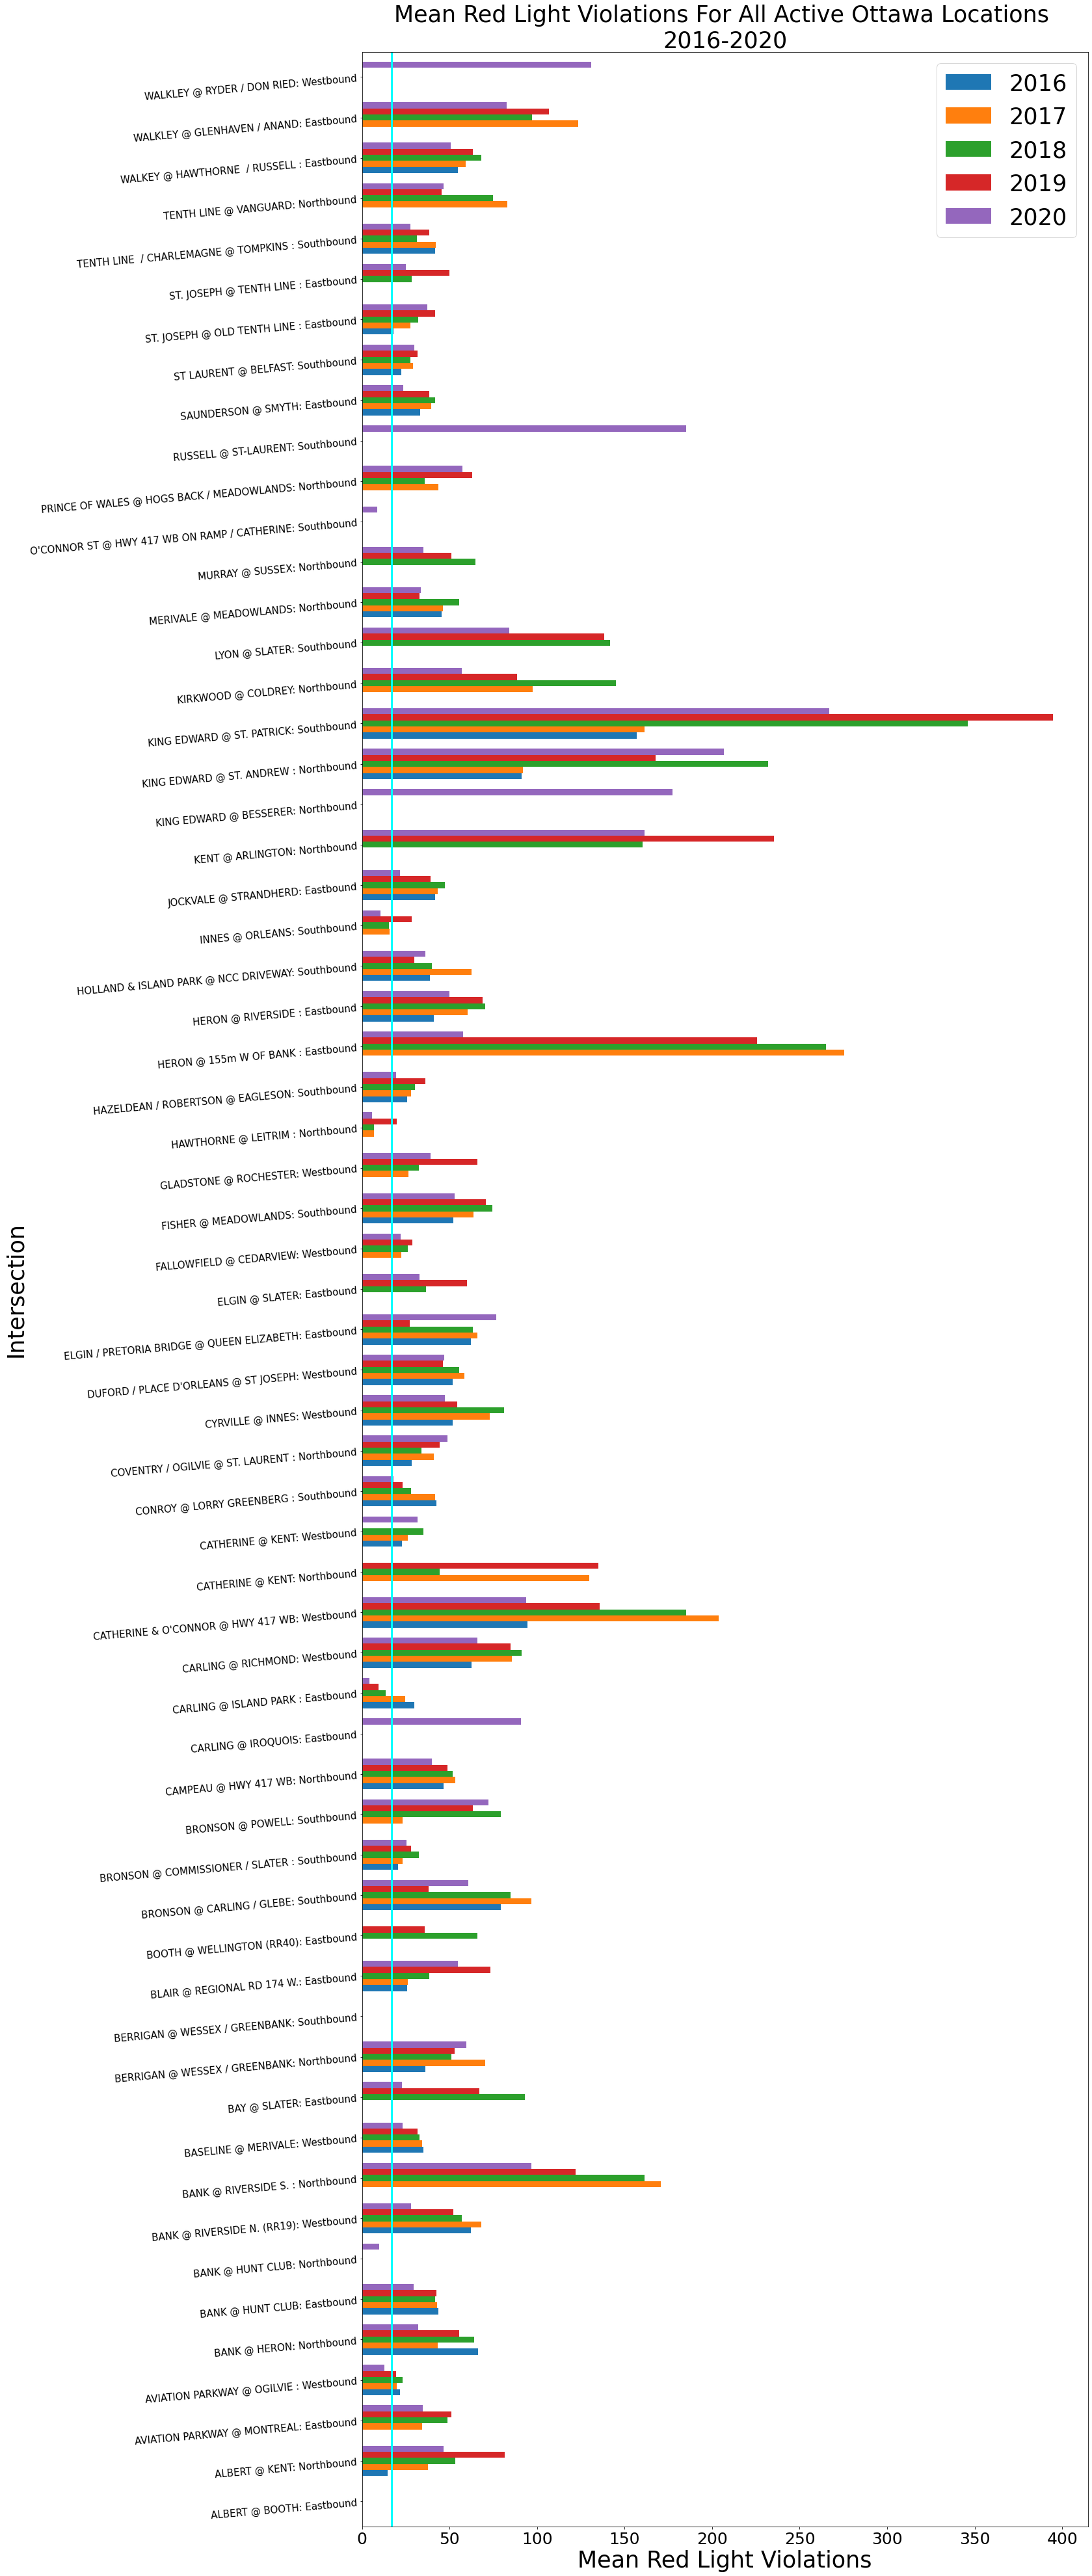

In [132]:
sort_by_intersection_mean_table.plot(
    kind = 'barh',
    width = .75,
    figsize = (20,70),
)
plt.title('Mean Red Light Violations For All Active Ottawa Locations \n2016-2020', fontsize=35)
plt.ylabel('Intersection', fontsize=35)
plt.yticks(fontsize=15, rotation = 5)
plt.xlabel('Mean Red Light Violations', fontsize=35)
plt.xticks(fontsize=25)
plt.axvline(x=17,  color='cyan', linewidth = 3)
plt.legend(prop={'size':35})
plt.savefig('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/all-intersections-mean-barh.png', bbox_inches='tight', facecolor = 'white')

In [133]:
sort_by_intersection_total_trimmed = sort_by_intersection.drop(['Mean_Active_Months','Calculated_Highest_Monthly_Value','CAMERA_INSTALL_YEAR','LATITUDE','LONGITUDE','X','Y','JANUARY', 'FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER','HIGHEST_MONTHLY_TOTAL', 'Null_Months','Active_Months'], axis=1)
sort_by_intersection_total_trimmed

,Year,INTERSECTION,CAMERA_FACING,TOTAL_VIOLATIONS
13,2020,ALBERT @ BOOTH,Eastbound,0.0
74,2019,ALBERT @ BOOTH,Eastbound,NaN
129,2018,ALBERT @ BOOTH,Eastbound,0.0
184,2017,ALBERT @ BOOTH,Eastbound,0.0
239,2016,ALBERT @ BOOTH,Eastbound,0.0
...,...,...,...,...
110,2019,WALKLEY @ GLENHAVEN / ANAND,Eastbound,1282.0
165,2018,WALKLEY @ GLENHAVEN / ANAND,Eastbound,1068.0
220,2017,WALKLEY @ GLENHAVEN / ANAND,Eastbound,370.0
275,2016,WALKLEY @ GLENHAVEN / ANAND,Eastbound,0.0


In [134]:
sort_by_intersection_total_table = sort_by_intersection_total_trimmed.pivot(index=['INTERSECTION','CAMERA_FACING'], columns='Year', values='TOTAL_VIOLATIONS')
sort_by_intersection_total_table.index = [': '.join(i) for i in sort_by_intersection_total_table.index]
sort_by_intersection_total_table


Year,2016,2017,2018,2019,2020
ALBERT @ BOOTH: Eastbound,0.0,0.0,0.0,NaN,0.0
ALBERT @ KENT: Northbound,145.0,378.0,481.0,978.0,557.0
AVIATION PARKWAY @ MONTREAL: Eastbound,0.0,103.0,584.0,611.0,417.0
AVIATION PARKWAY @ OGILVIE : Westbound,262.0,237.0,276.0,213.0,155.0
BANK @ HERON: Northbound,797.0,347.0,770.0,666.0,383.0
...,...,...,...,...,...
TENTH LINE / CHARLEMAGNE @ TOMPKINS : Southbound,499.0,506.0,283.0,462.0,333.0
TENTH LINE @ VANGUARD: Northbound,0.0,249.0,898.0,545.0,557.0
WALKEY @ HAWTHORNE / RUSSELL : Eastbound,657.0,712.0,818.0,759.0,354.0
WALKLEY @ GLENHAVEN / ANAND: Eastbound,0.0,370.0,1068.0,1282.0,992.0


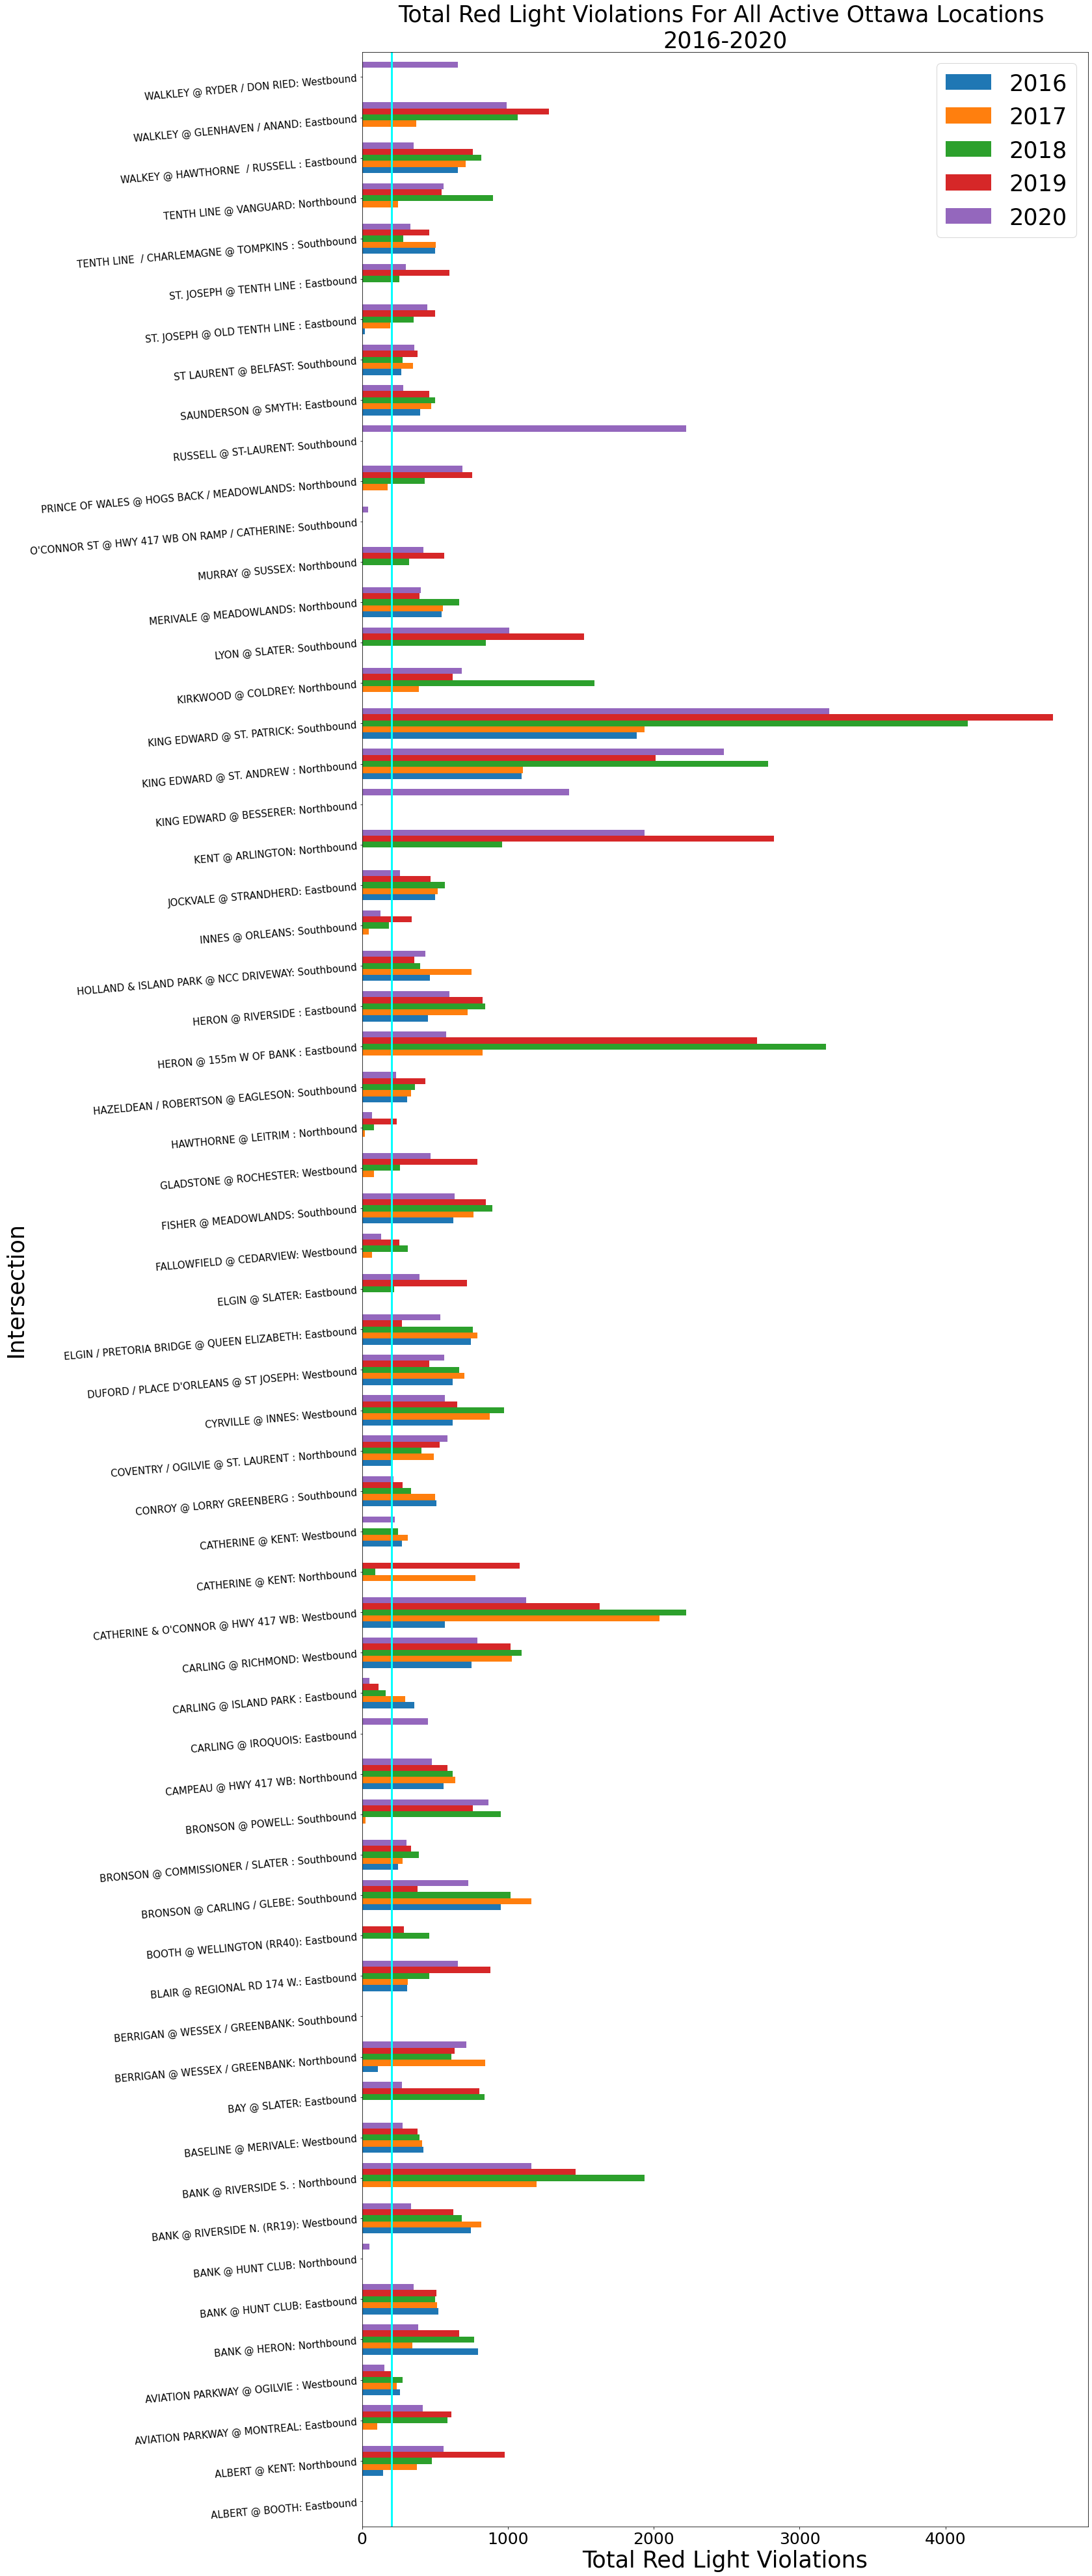

In [135]:
sort_by_intersection_total_table.plot(
    kind = 'barh',
    width = .75,
    figsize = (20,70),
)
plt.title('Total Red Light Violations For All Active Ottawa Locations \n2016-2020', fontsize=35)
plt.ylabel('Intersection', fontsize=35)
plt.yticks(fontsize=15, rotation = 5)
plt.xlabel('Total Red Light Violations', fontsize=35)
plt.xticks(fontsize=25)
plt.axvline(x=204,  color='cyan', linewidth = 3)
plt.legend(prop={'size':35})
plt.savefig('/Users/anjawu/Code/anjawu.github.io/images/pages/projects/redlight/all-intersections-total-barh.png', bbox_inches='tight', facecolor = 'white')

<span style="color:lightseagreen; font-size:1.3em;">
	Looking at the data using all years and taking the locations that did not breakeven from the grouped data (Avg of 2016-2020) we can seee that the same locations still did not breakeven: <br>
    - O'Connor st @ HWY 417 WB on ramp / Catherine: Southbound <i>data only from 2020; look into date of install</i> <br>
    - Innes @ Orleans: Southbound<br>
    - Hawthorne @ Leitrim: Northbound <br>
    - Fallowfield @ Cedarview: Westbound <i>is above the breakeven point for monthly mean but not for the total violations look into number of active months</i><br>
    - Carling @ Island Park: Eastbound <br>
    - Booth @ Wellington (RR40): Eastbound<br>
    - Berrigan @ Wessex/Greenbank: Southbound <br>
    - Bank @ Hunt Club: Northbound <i>data only from 2020; look into date of install</i><br>
    - Albert @ Booth: Eastbound<br><br>
    Some new locations which have decreased to below the breakpoint for just 2020 are:<br>
    - Aviation Parkway @ Ogilvie: Westbound <br><br>
    We can also see that Conroy @ Lorry Greenberg: Southbound is very close to being below breakpoint for total violations<br><br>
</span> 

In [136]:
complete_df[(complete_df['INTERSECTION'].str.contains('BANK @ HUNT CLUB')) & (complete_df['CAMERA_FACING'].str.contains('Northbound'))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR', 'CAMERA_FACING','TOTAL_VIOLATIONS','Mean_Active_Months'] + MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
56,2020,BANK @ HUNT CLUB,2020,Northbound,49.0,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,12.0,16.0,5.0,14.0


In [137]:
complete_df[(complete_df['INTERSECTION'].str.contains('CONNOR')) & (complete_df['CAMERA_FACING'].str.contains('Southbound'))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR', 'CAMERA_FACING','TOTAL_VIOLATIONS','Mean_Active_Months'] + MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
57,2020,O'CONNOR ST @ HWY 417 WB ON RAMP / CATHERINE,2020,Southbound,44.0,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,12.0,9.0,10.0,10.0


In [138]:
complete_df[(complete_df['INTERSECTION'].str.contains('FALLOWFIELD')) & (complete_df['CAMERA_FACING'].str.contains('Westbound'))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR', 'CAMERA_FACING','TOTAL_VIOLATIONS','Mean_Active_Months'] + MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
47,2020,FALLOWFIELD @ CEDARVIEW,2017,Westbound,133.0,22.166667,NaN,NaN,NaN,NaN,NaN,NaN,21.0,24.0,21.0,22.0,20.0,25.0
108,2019,FALLOWFIELD @ CEDARVIEW,2017,Westbound,258.0,28.666667,42.0,23.0,17.0,27.0,29.0,34.0,44.0,32.0,NaN,10.0,NaN,NaN
163,2018,FALLOWFIELD @ CEDARVIEW,2017,Westbound,313.0,26.083333,26.0,18.0,21.0,11.0,43.0,36.0,33.0,30.0,20.0,26.0,25.0,24.0
218,2017,FALLOWFIELD @ CEDARVIEW,2017,Westbound,67.0,22.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,31.0,20.0
273,2016,FALLOWFIELD @ CEDARVIEW,2017,Westbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:royalblue; font-size:1.3em;">
    We can see:<br>
    - Bank @ Hunt Club: Northbound was installed in August of 2020, so there is not sufficient data to make any conclusions about it. <br>
    - O'Connor st @ HWY 417 WB on ramp / Catherine: Southbound was installed in August of 2020, so there is not sufficient data to make any conclusions about it. <br>   
    - Fallowfield @ Cedarview: Westbound did not breakeven for total violations for 2020 because it was not operation for 6 months (Jan-Jun).
</span> 

<span style="color:orangered; font-size:1.3em;">
    Some errors to look into:<br>
    - Catherine @ Kent: Northbound is missing data for 2020<br>
    - Booth @ Wellington (RR40): Eastbound is missing data for 2020<br>
    - Berrigan @ Wessex/Greenbank: Southbound all data missing <br>
    - Albert @ Booth: Eastbound all data missing<br><br>
</span> 

In [139]:
complete_df[(complete_df['INTERSECTION'].str.contains('CATHERINE')) & (complete_df['CAMERA_FACING'].str.contains('Northbound'))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR', 'CAMERA_FACING','TOTAL_VIOLATIONS','Mean_Active_Months'] + MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
36,2020,CATHERINE @ KENT,2017,Northbound,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
97,2019,CATHERINE @ KENT,2017,Northbound,1080.0,135.000000,NaN,NaN,NaN,62.0,164.0,210.0,205.0,160.0,109.0,170.0,0.0,NaN
152,2018,CATHERINE @ KENT,2017,Northbound,89.0,44.500000,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0
207,2017,CATHERINE @ KENT,2017,Northbound,778.0,129.666667,NaN,NaN,NaN,NaN,NaN,NaN,103.0,141.0,207.0,145.0,87.0,95.0
262,2016,CATHERINE @ KENT,2017,Northbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
complete_df[(complete_df['INTERSECTION'].str.contains('BOOTH @ WELLINGTON')) & (complete_df['CAMERA_FACING'].str.contains('Eastbound'))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR', 'CAMERA_FACING','TOTAL_VIOLATIONS','Mean_Active_Months'] + MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
7,2020,BOOTH @ WELLINGTON (RR40),2009,Eastbound,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
68,2019,BOOTH @ WELLINGTON (RR40),2009,Eastbound,286.0,35.75,51.0,53.0,53.0,36.0,27.0,30.0,26.0,10.0,NaN,NaN,NaN,NaN
123,2018,BOOTH @ WELLINGTON (RR40),2009,Eastbound,462.0,66.00,NaN,NaN,NaN,NaN,NaN,27.0,78.0,117.0,71.0,75.0,60.0,34.0
178,2017,BOOTH @ WELLINGTON (RR40),2009,Eastbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,2016,BOOTH @ WELLINGTON (RR40),2009,Eastbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
complete_df[(complete_df['INTERSECTION'].str.contains('ALBERT')) & (complete_df['CAMERA_FACING'].str.contains('Eastbound'))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR', 'CAMERA_FACING','TOTAL_VIOLATIONS','Mean_Active_Months'] + MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
13,2020,ALBERT @ BOOTH,2010,Eastbound,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
74,2019,ALBERT @ BOOTH,2010,Eastbound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,2018,ALBERT @ BOOTH,2010,Eastbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,2017,ALBERT @ BOOTH,2010,Eastbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,2016,ALBERT @ BOOTH,2010,Eastbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
complete_df[(complete_df['INTERSECTION'].str.contains('BERRIGAN')) & (complete_df['CAMERA_FACING'].str.contains('Southbound'))][['Year','INTERSECTION','CAMERA_INSTALL_YEAR', 'CAMERA_FACING','TOTAL_VIOLATIONS','Mean_Active_Months'] + MONTH_COLUMNS]


,Year,INTERSECTION,CAMERA_INSTALL_YEAR,CAMERA_FACING,TOTAL_VIOLATIONS,Mean_Active_Months,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
17,2020,BERRIGAN @ WESSEX / GREENBANK,2010,Southbound,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
78,2019,BERRIGAN @ WESSEX / GREENBANK,2010,Southbound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,2018,BERRIGAN @ WESSEX / GREENBANK,2010,Southbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,2017,BERRIGAN @ WESSEX / GREENBANK,2010,Southbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2016,BERRIGAN @ WESSEX / GREENBANK,2010,Southbound,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:royalblue; font-size:1.5em;">
	All errors seem to be due to data collection. This means that no really findings can be gathered about:<br>
    - Catherine @ Kent: Northbound for the year 2020<br>
    - Booth @ Wellington (RR40): Eastbound for the year 2020<br>
    - Berrigan @ Wessex/Greenbank: Southbound for all years 2016-2020 <br>
    - Albert @ Booth: Eastbound for all years 2016-2020<br><br>
</span> 